In [2]:
#het importeren van de benodigheden
import sqlite3
import pandas as pd
from sqlalchemy import create_engine, text
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Sprint 2.1:

# Beschrijving van de data

We hebben de tabellen Country, League, Match, Player, Player_Attributes, Team en Team_Attributes

In de Country tabel staan de landen die gebruikt worden met daar bij een land id.

In de League tabel staan de verschillende leagues die gebruikt worden met daarbij het bijbehorende land, ook staat in de tabel een land id en een league id.

In de Match tabel staat de meeste informatie, je hebt hier staan wat de uitslag is, welke positie een speler heeft op het veld via een X en Y grid, Wie spelers waren via speler ID, er zijn een paar kolommen (goal, shoton, shotoff, foulcommit, card, cross, corner, possession) waar informatie staat over de desbetreffende gegevens, die informatie in deze kolommen is heel onduidelijk en we moeten nog kijken hoe we dit gaan toepassen. Ook heb je voor een paar gokwebsites de odds voor de wedstrijd, deze odds zijn van voordat de wedstrijd begon (Home odds, gelijkspel odds en Away odds). Als laatst hebben we een id van de wedstrijd, een lands id, een league id, het seizoen dat het gebeurde, de stage waar het gebeurde (speelweek) en wanneer het gebeurde. Ook hebben we nog een match_api_id, een home_team_api_id en een away_team_api_id.

In de Player tabel staan de verschillende spelers met daarbij hun geboortedatum, lengte en gewicht. Ook hebben ze een ID, player_api_id en een player_fifa_api_id

In de Player_Attributes tabel staan per spelers hun fifa ratings per verschillend onderdeel, denk bijvoorbeeld aan rating, potentie, shooting en dribbling. Ook staan hoeveel moeite ze stoppen in aanvallen en verdedigen in fifa en wat hun favoriete voet is om mee te spelen. Als laatste hebben ze ook nog een ID, een player_fifa_api_id, een player_api_id en de datum dat deze gegevens opgenomen zijn.

In de Team tabel staat een id, een team_api_id, een team_fifa_api_id, een team naam en een afkorting van de team naam.

In de Team_Attributes tabel een id, een team_fifa_api_id, een team_api_id en de datum dat de gegevens afgenomen zijn. Ook staat erin hoe het team speelt in fifa, denk bijvoorbeeld aan hoe wijd ze verdedigen of hoeveel ze hun kansen maken via passen en met wat voor passen ze gebruiken.



In [3]:
#Het laden van de dataframes voor sql
cnx = sqlite3.connect("database.sqlite")

league_df = pd.read_sql_query("SELECT * FROM League", cnx)
match_df = pd.read_sql_query("SELECT * FROM Match", cnx)
team_df = pd.read_sql_query("SELECT * FROM Team", cnx)

Deze 3 cellen hieronder zijn code die we van het vak Data II gekopiëerd hebben zodat we SQL kunnen gebruiken in python

In [4]:
def show_query(query):
    """
       Deze functie print de output van je SQL query uit.
       Parameters:
                  query = Je SQL query.
                          Zorg ervoor dat deze parameter een string is.
    """
    query_output = engine.execute(query).fetchall()
    column_names = engine.execute(query)._metadata.keys
    return pd.DataFrame(query_output, columns = column_names)

In [5]:
def df_to_database(df, name):
    """
       Deze functie maakt een database van een dataframe.
       Parameters:
                  df  = de dataframe waarvan je een database tabel wil maken.
                         
                  name = De naam die je de database wil geven.
                         Zorg ervoor dat deze parameter een string is.
    """
    df.to_sql(name, con=engine)
    
    display(df)


In [6]:
engine = create_engine('sqlite://', echo=False)


In [7]:
#Hier worden de databases gemaakt zodat we die via sql kunnen gebruiken
df_to_database(team_df, 'team')
df_to_database(league_df, 'league')
df_to_database(match_df, 'match')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
query1 = """

SELECT *
  FROM team
  WHERE team_long_name LIKE '%Fey%'

                  
"""

show_query(query1)

#team id is 167, team_api_id is 10235 en team_fifa_api_id is 246
#Team naam is Feyenoord en afkorting is FEY

,index,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,167,26558,10235,246.0,Feyenoord,FEY


In [9]:
query2 = """

SELECT le.name,le.id
FROM team AS te
INNER JOIN match as ma
ON te.team_api_id = ma.home_team_api_id
INNER JOIN league as le
ON le.country_id = ma.country_id
WHERE te.team_api_id = 10235
LIMIT 1


"""

show_query(query2)

#De league is 'Netherlands Eredivisie' waarvan het id 13274 is

,name,id
0,Netherlands Eredivisie,13274


In [10]:
query3 = """

SELECT ma1.*, te.team_long_name AS Home_team_name, te2.team_long_name AS Away_team_name
FROM match AS ma1
INNER JOIN team as te
ON te.team_api_id = ma1.home_team_api_id
INNER JOIN team AS te2
ON te2.team_api_id = ma1.away_team_api_id
WHERE te.team_api_id = 10235 OR te2.team_api_id = 10235
"""

show_query(query3)
#Je ziet hier alle wedstrijden van feyenoord die in de database staan

,index,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Home_team_name,Away_team_name
0,13278,13279,13274,13274,2008/2009,1,2008-08-31 00:00:00,508307,9791,10235,...,3.4,1.70,4.00,3.4,1.80,4.33,3.3,1.73,Heracles Almelo,Feyenoord
1,13289,13290,13274,13274,2008/2009,10,2008-11-09 00:00:00,523738,10235,9908,...,3.4,4.35,1.67,3.5,4.75,1.67,3.5,4.75,Feyenoord,FC Utrecht
2,13299,13300,13274,13274,2008/2009,11,2008-11-16 00:00:00,523748,8611,10235,...,3.5,3.50,2.00,3.3,3.40,1.95,3.3,3.50,FC Twente,Feyenoord
3,13306,13307,13274,13274,2008/2009,12,2008-11-23 00:00:00,523755,10235,10217,...,4.5,8.00,1.35,4.5,7.50,1.33,4.5,8.00,Feyenoord,ADO Den Haag
4,13314,13315,13274,13274,2008/2009,13,2008-11-30 00:00:00,523763,8277,10235,...,3.4,2.20,2.85,3.3,2.30,2.88,3.3,2.20,Vitesse,Feyenoord
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,15682,15683,13274,13274,2015/2016,5,2015-09-13 00:00:00,1983314,10235,8525,...,5.0,7.50,NaN,NaN,NaN,NaN,NaN,NaN,Feyenoord,Willem II
268,15690,15691,13274,13274,2015/2016,6,2015-09-20 00:00:00,1983322,9803,10235,...,4.0,1.73,NaN,NaN,NaN,NaN,NaN,NaN,Roda JC Kerkrade,Feyenoord
269,15700,15701,13274,13274,2015/2016,7,2015-09-27 00:00:00,1983332,10235,6413,...,5.0,7.50,NaN,NaN,NaN,NaN,NaN,NaN,Feyenoord,PEC Zwolle
270,15708,15709,13274,13274,2015/2016,8,2015-10-04 00:00:00,1983340,8526,10235,...,5.0,1.40,NaN,NaN,NaN,NaN,NaN,NaN,De Graafschap,Feyenoord


In [11]:
query4 = """

SELECT ma1.*, te.team_long_name AS Home_team_name, te2.team_long_name AS Away_team_name
FROM match AS ma1
INNER JOIN team as te
ON te.team_api_id = ma1.home_team_api_id
INNER JOIN team AS te2
ON te2.team_api_id = ma1.away_team_api_id
WHERE (te.team_api_id = 10235 OR te2.team_api_id = 10235) AND ma1.season= '2008/2009'
GROUP BY Home_team_name

"""

show_query(query4)
#Je ziet hier alle wedstrijden van feyenoord die in de database staan

,index,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Home_team_name,Away_team_name
0,13503,13504,13274,13274,2008/2009,32,2009-04-26 00:00:00,523934,10217,10235,...,3.40,2.10,3.00,3.30,2.15,3.00,3.30,2.20,ADO Den Haag,Feyenoord
1,13458,13459,13274,13274,2008/2009,28,2009-03-22 00:00:00,523898,10229,10235,...,3.60,7.00,1.50,3.75,6.50,1.44,3.75,7.00,AZ,Feyenoord
2,13413,13414,13274,13274,2008/2009,23,2009-02-15 00:00:00,523853,8593,10235,...,3.60,6.00,1.57,3.60,5.50,1.53,3.75,5.50,Ajax,Feyenoord
3,13424,13425,13274,13274,2008/2009,24,2009-02-22 00:00:00,523864,8526,10235,...,3.30,2.00,3.50,3.25,2.00,3.30,3.25,2.05,De Graafschap,Feyenoord
4,13533,13534,13274,13274,2008/2009,4,2008-09-28 00:00:00,523685,8674,10235,...,3.30,2.50,2.55,3.30,2.45,2.50,3.30,2.50,FC Groningen,Feyenoord
5,13299,13300,13274,13274,2008/2009,11,2008-11-16 00:00:00,523748,8611,10235,...,3.50,3.50,2.00,3.30,3.40,1.95,3.30,3.50,FC Twente,Feyenoord
6,13509,13510,13274,13274,2008/2009,33,2009-05-03 00:00:00,523940,9908,10235,...,3.25,2.40,2.60,3.25,2.40,2.70,3.25,2.38,FC Utrecht,Feyenoord
7,13470,13471,13274,13274,2008/2009,29,2009-04-05 00:00:00,523910,6601,10235,...,3.30,1.95,3.60,3.35,1.90,3.60,3.30,1.91,FC Volendam,Feyenoord
8,13289,13290,13274,13274,2008/2009,10,2008-11-09 00:00:00,523738,10235,9908,...,3.40,4.35,1.67,3.50,4.75,1.67,3.50,4.75,Feyenoord,FC Utrecht
9,13278,13279,13274,13274,2008/2009,1,2008-08-31 00:00:00,508307,9791,10235,...,3.40,1.70,4.00,3.40,1.80,4.33,3.30,1.73,Heracles Almelo,Feyenoord


# Sprint 3.1:

In [12]:
def matches_played(team):
    """
    Deze functie laat zien hoeveel wedstrijden een zelf gekozen team in elk seizoen gespeelt heeft
    Parameters:
            team (int): het team waarvan je het wil zien
            
        Returns:
            show_query(query5) (pandas dataframe): geeft een dataframe terug met de data
    """
    
    
    query5 = f"""

    SELECT ma1.season, COUNT(ma1.match_api_id) AS matches_played
    FROM match AS ma1
    INNER JOIN team as te
    ON te.team_api_id = ma1.home_team_api_id
    INNER JOIN team AS te2
    ON te2.team_api_id = ma1.away_team_api_id
    WHERE (te.team_api_id = {team} OR te2.team_api_id = {team})
    GROUP BY season


    """

    return show_query(query5)

matches_played(10235)

#je ziet hier dat feyenoord 34 wedstrijden gespeeld heeft elk seizoen.

,season,matches_played
0,2008/2009,34
1,2009/2010,34
2,2010/2011,34
3,2011/2012,34
4,2012/2013,34
5,2013/2014,34
6,2014/2015,34
7,2015/2016,34


In [13]:
def matches_year(team,year):
    """
    Deze functie laat zien hoeveel wedstrijden een zelf gekozen team in een zelf gekozen jaar
    Parameters:
            team (int): het team waarvan je het wil zien
            year (str): het jaar waarvan je het wil zien
            
        Returns:
            show_query(query6) (pandas dataframe): geeft een dataframe terug met de data
    """
    query6 = f"""

    SELECT ma1.season, COUNT(ma1.match_api_id) AS matches_played
    FROM match AS ma1
    INNER JOIN team as te
    ON te.team_api_id = ma1.home_team_api_id
    INNER JOIN team AS te2
    ON te2.team_api_id = ma1.away_team_api_id
    WHERE (te.team_api_id = {team} OR te2.team_api_id = {team}) AND ma1.date LIKE '{year}%'
    GROUP BY season


    """

    return show_query(query6)
matches_year(10235,2010)
#je ziet dat feyenoord in het jaar 2010 in het 2009/2010 seizoen 16 wedstrijden heeft gespeeld en in het 2010/2011 seizoen 18 wedstrijden heeft gespeeld

,season,matches_played
0,2009/2010,16
1,2010/2011,18


Ik heb de mega_ranglijst functie hieronder gemaakt door via WITH 2 queries toe te voegen die de home punten en de away punten en de goals hebben waardoor ik uiteindelijk via de hoofdquery het bij elkaar kan tellen en linken op het team en seizoen en dat nog gesorteerd op eerst seizoen en daarna punten en dan ook nog op doelpunten saldo. Ik heb ook nog toegevoegd dat posities geteld word voor elk seizoen.

In [14]:
def mega_ranglijst(league):
        """
        Deze functie laat alle ranglijsten van een league zien
        Parameters:
                league (int): het league waarvan je het wil zien

            Returns:
                show_query(query7) (pandas dataframe): geeft een dataframe terug met de data
        """
        query7 = f"""
        WITH test4 AS
        (SELECT ma1.season, ma1.home_team_api_id AS home_team, te.team_long_name, SUM(ma1.home_team_goal) AS home_goals_scored, SUM(ma1.away_team_goal) AS home_goals_conceited,
        SUM(CASE WHEN ma1.home_team_goal > ma1.away_team_goal THEN 3
             WHEN ma1.home_team_goal = ma1.away_team_goal THEN 1
             ELSE 0 END) AS home_punten


        FROM match AS ma1

        INNER JOIN team as te
        ON te.team_api_id = ma1.home_team_api_id
        INNER JOIN team AS te2
        ON te2.team_api_id = ma2.away_team_api_id
        INNER JOIN match as ma2
        ON ma1.match_api_id = ma2.match_api_id
        WHERE ma1.league_id = {league} 
        GROUP BY ma1.season, te.team_api_id
        ORDER BY ma1.season),

       
        test3 AS
        (SELECT ma1.season, ma2.away_team_api_id AS away_team, te2.team_long_name, SUM(ma2.away_team_goal) AS away_goals_scored, SUM(ma2.home_team_goal) AS away_goals_conceited,
        SUM(CASE WHEN ma2.home_team_goal < ma2.away_team_goal THEN 3
             WHEN ma2.home_team_goal = ma2.away_team_goal THEN 1
             ELSE 0 END) AS away_punten

        FROM match AS ma1

        INNER JOIN team as te
        ON te.team_api_id = ma1.home_team_api_id
        INNER JOIN team AS te2
        ON te2.team_api_id = ma2.away_team_api_id
        INNER JOIN match as ma2
        ON ma1.match_api_id = ma2.match_api_id
        WHERE ma2.league_id = {league}


        GROUP BY ma2.season, te2.team_api_id
        ORDER BY away_punten) 


        SELECT te4.season,
        RANK() OVER(PARTITION BY te4.season ORDER BY (te4.home_punten + te8.away_punten) DESC, ((te4.home_goals_scored + te8.away_goals_scored)  - (te4.home_goals_conceited + te8.away_goals_conceited)) DESC) AS Position,
        te4.home_team AS Team_id, te4.team_long_name AS Team_name, (te4.home_punten + te8.away_punten) AS totale_punten,
        (te4.home_goals_scored + te8.away_goals_scored)  - (te4.home_goals_conceited + te8.away_goals_conceited)  AS goal_saldo
        
        FROM test4 AS te4
        INNER JOIN test3 AS te8
        ON te4.home_team = te8.away_team AND te4.season = te8.season

        GROUP BY te4.season, te4.home_team

        ORDER BY te4.season, totale_punten DESC, goal_saldo DESC

        """

        return show_query(query7)


mega_ranglijst(13274)
#Je ziet hier alle seizoenen van de Eredivisie

,season,Position,Team_id,Team_name,totale_punten,goal_saldo
0,2008/2009,1,10229,AZ,80,44
1,2008/2009,2,8611,FC Twente,69,31
2,2008/2009,3,8593,Ajax,68,33
3,2008/2009,4,8640,PSV,65,38
4,2008/2009,5,10228,SC Heerenveen,60,9
...,...,...,...,...,...,...
139,2015/2016,14,9803,Roda JC Kerkrade,34,-21
140,2015/2016,15,10218,Excelsior,30,-26
141,2015/2016,16,8525,Willem II,29,-18
142,2015/2016,17,8526,De Graafschap,23,-27


Ik heb de functie hierboven gekopieerd en eigenlijk alleen een extra parameter toegevoegd waarmee je het op een specifiek seizoen kan zoeken.

In [15]:
def seizoens_ranglijst(league,seizoen):
        """
        Deze functie laat een ranglijst zien van een zelfgekozen league en seizoen
        Parameters:
                league (int): het team waarvan je het wil zien
                seizoen (str): het seizoen waarvan je het wil zien

            Returns:
                show_query(query7) (pandas dataframe): geeft een dataframe terug met de data
        """
        query7 = f"""
        WITH test4 AS
        (SELECT ma1.season, ma1.home_team_api_id AS home_team, te.team_long_name, SUM(ma1.home_team_goal) AS home_goals_scored, SUM(ma1.away_team_goal) AS home_goals_conceited,
        SUM(CASE WHEN ma1.home_team_goal > ma1.away_team_goal THEN 3
             WHEN ma1.home_team_goal = ma1.away_team_goal THEN 1
             ELSE 0 END) AS home_punten


        FROM match AS ma1

        INNER JOIN team as te
        ON te.team_api_id = ma1.home_team_api_id
        INNER JOIN team AS te2
        ON te2.team_api_id = ma2.away_team_api_id
        INNER JOIN match as ma2
        ON ma1.match_api_id = ma2.match_api_id
        WHERE ma1.league_id = {league} 
        GROUP BY ma1.season, te.team_api_id
        ORDER BY ma1.season),

       
        test3 AS
        (SELECT ma1.season, ma2.away_team_api_id AS away_team, te2.team_long_name, SUM(ma2.away_team_goal) AS away_goals_scored, SUM(ma2.home_team_goal) AS away_goals_conceited,
        SUM(CASE WHEN ma2.home_team_goal < ma2.away_team_goal THEN 3
             WHEN ma2.home_team_goal = ma2.away_team_goal THEN 1
             ELSE 0 END) AS away_punten

        FROM match AS ma1

        INNER JOIN team as te
        ON te.team_api_id = ma1.home_team_api_id
        INNER JOIN team AS te2
        ON te2.team_api_id = ma2.away_team_api_id
        INNER JOIN match as ma2
        ON ma1.match_api_id = ma2.match_api_id
        WHERE ma2.league_id = {league}


        GROUP BY ma2.season, te2.team_api_id
        ORDER BY away_punten) 


        SELECT te4.season,RANK() OVER(ORDER BY (te4.home_punten + te8.away_punten) DESC,((te4.home_goals_scored + te8.away_goals_scored)  - (te4.home_goals_conceited + te8.away_goals_conceited)) DESC) AS Position, te4.home_team AS Team_id, te4.team_long_name AS Team_name, (te4.home_punten + te8.away_punten) AS totale_punten,  
        
        (te4.home_goals_scored + te8.away_goals_scored)  - (te4.home_goals_conceited + te8.away_goals_conceited)  AS goal_saldo

        FROM test4 AS te4
        INNER JOIN test3 AS te8
        ON te4.home_team = te8.away_team AND te4.season = te8.season
        WHERE te4.season = '{seizoen}'

        GROUP BY te4.season, te4.home_team

        ORDER BY te4.season, totale_punten DESC, goal_saldo DESC

        """

        return show_query(query7)

seizoens_ranglijst(13274,'2008/2009')
#Je ziet dus dat feyenoord 6de was met 45 punten in het seizoen 2008/2009

,season,Position,Team_id,Team_name,totale_punten,goal_saldo
0,2008/2009,1,10229,AZ,80,44
1,2008/2009,2,8611,FC Twente,69,31
2,2008/2009,3,8593,Ajax,68,33
3,2008/2009,4,8640,PSV,65,38
4,2008/2009,5,10228,SC Heerenveen,60,9
5,2008/2009,6,8674,FC Groningen,56,17
6,2008/2009,7,10235,Feyenoord,45,8
7,2008/2009,8,9761,NAC Breda,45,-10
8,2008/2009,9,9908,FC Utrecht,44,-3
9,2008/2009,10,8277,Vitesse,43,-7


Ik heb ook nog een extra functie gemaakt waar je kan zien welke plek jouw team is geeindigd in elk seizoen

In [16]:
def Posities_team(team):
        """
        Deze functie laat alle ranglijsten van een league zien
        Parameters:
                team (str): het team waarvan je het wil zien

            Returns:
                show_query(query7) (pandas dataframe): geeft een dataframe terug met de data
        """
        team_api_id = team_df.loc[(team_df['team_long_name'] == team)]['team_api_id'].values[0]

        league=  match_df.loc[(match_df['home_team_api_id'] == team_api_id)]['league_id'].values[0]

        query7 = f"""
        WITH test4 AS
        (SELECT ma1.season, ma1.home_team_api_id AS home_team, te.team_long_name, SUM(ma1.home_team_goal) AS home_goals_scored, SUM(ma1.away_team_goal) AS home_goals_conceited,
        SUM(CASE WHEN ma1.home_team_goal > ma1.away_team_goal THEN 3
             WHEN ma1.home_team_goal = ma1.away_team_goal THEN 1
             ELSE 0 END) AS home_punten


        FROM match AS ma1

        INNER JOIN team as te
        ON te.team_api_id = ma1.home_team_api_id
        INNER JOIN team AS te2
        ON te2.team_api_id = ma2.away_team_api_id
        INNER JOIN match as ma2
        ON ma1.match_api_id = ma2.match_api_id
        WHERE ma1.league_id = {league} 
        GROUP BY ma1.season, te.team_api_id
        ORDER BY ma1.season),

       
        test3 AS
        (SELECT ma1.season, ma2.away_team_api_id AS away_team, te2.team_long_name, SUM(ma2.away_team_goal) AS away_goals_scored, SUM(ma2.home_team_goal) AS away_goals_conceited,
        SUM(CASE WHEN ma2.home_team_goal < ma2.away_team_goal THEN 3
             WHEN ma2.home_team_goal = ma2.away_team_goal THEN 1
             ELSE 0 END) AS away_punten

        FROM match AS ma1

        INNER JOIN team as te
        ON te.team_api_id = ma1.home_team_api_id
        INNER JOIN team AS te2
        ON te2.team_api_id = ma2.away_team_api_id
        INNER JOIN match as ma2
        ON ma1.match_api_id = ma2.match_api_id
        


        GROUP BY ma2.season, te2.team_api_id
        ORDER BY away_punten),


        test5 AS
        (SELECT te4.season,
        RANK() OVER(PARTITION BY te4.season ORDER BY (te4.home_punten + te8.away_punten) DESC, ((te4.home_goals_scored + te8.away_goals_scored)  - (te4.home_goals_conceited + te8.away_goals_conceited)) DESC) AS Position,
        te4.home_team AS Team_id, te4.team_long_name AS Team_name, (te4.home_punten + te8.away_punten) AS totale_punten,
        (te4.home_goals_scored + te8.away_goals_scored)  - (te4.home_goals_conceited + te8.away_goals_conceited)  AS goal_saldo
        
        FROM test4 AS te4
        INNER JOIN test3 AS te8
        ON te4.home_team = te8.away_team AND te4.season = te8.season

        GROUP BY te4.season, te4.home_team

        ORDER BY te4.season, totale_punten DESC, goal_saldo DESC)
        SELECT te5.season, te5.Team_name, te5.Position
        FROM test5 AS te5
        WHERE te5.Team_name = '{team}'

        """

        return show_query(query7)


Posities_team('Feyenoord')
#Je ziet hier waar Feyenoord is geeindigd in elk seizoen

,season,Team_name,Position
0,2008/2009,Feyenoord,7
1,2009/2010,Feyenoord,4
2,2010/2011,Feyenoord,10
3,2011/2012,Feyenoord,2
4,2012/2013,Feyenoord,3
5,2013/2014,Feyenoord,2
6,2014/2015,Feyenoord,4
7,2015/2016,Feyenoord,3


# Sprint 2.2:

Wij hebben gekozen om met classes te werken omdat dat ons het handigste leek in verband met de opdracht

In [17]:
class FootballData:
    """
    Class to get and describe the data from kaggle soccer dataset
    """
    def __init__(self, data_path):
        """
        Initialize data from kaggle to use in other methods
        """
        self.cnx = sqlite3.connect(data_path)

        self.country_df = pd.read_sql_query("SELECT * FROM Country", self.cnx)
        self.league_df = pd.read_sql_query("SELECT * FROM League", self.cnx)
        self.match_df = pd.read_sql_query("SELECT * FROM Match", self.cnx)
        self.player_df = pd.read_sql_query("SELECT * FROM Player", self.cnx)
        self.player_att_df = pd.read_sql_query("SELECT * FROM Player_Attributes", self.cnx)
        self.team_df = pd.read_sql_query("SELECT * FROM Team", self.cnx)
        self.team_att_df = pd.read_sql_query("SELECT * FROM Team_Attributes", self.cnx)
        
    def get_league_season_data(self, league, season):
        """
        Return all match data from a competition in a season
        """
        # Get the data from the dataframe

        league_api_id = self.league_df.loc[(self.league_df['name'] == league)]['id'].values[0]
        
        league_matches = self.match_df.loc[(self.match_df['league_id'] == league_api_id) &  
                                           (self.match_df['season'] == season)].copy()
        # Add Home and away column for points to able to differentiate between games played home and games played away

        
        league_matches["points_for_home"] = np.where(league_matches['home_team_goal'] > league_matches['away_team_goal'], 3,
                                             np.where(league_matches['home_team_goal'] == league_matches['away_team_goal'], 1, 0))
        league_matches["points_for_away"] = np.where(league_matches['home_team_goal'] < league_matches['away_team_goal'], 3,
                                             np.where(league_matches['home_team_goal'] == league_matches['away_team_goal'], 1, 0))
        # Split the the dataframe in to home_games and away_games so we can like it to the correct ID's
        
        home_games = league_matches.groupby('home_team_api_id').sum().sort_values("points_for_home")
        away_games = league_matches.groupby('away_team_api_id').sum().sort_values("points_for_away")
        
        # Making our eventual 'Ranglijst' dataframe
        ranglijst = pd.DataFrame()
        
        # Adding the columns to the 'Ranglijst' dataframe
        ranglijst['Team_id']= self.match_df.loc[(self.match_df['league_id'] == league_api_id) &  (self.match_df['season'] == season), 'home_team_api_id'].unique()
        ranglijst['Team_Name'] = pd.merge(ranglijst, self.team_df, left_on =ranglijst['Team_id'], right_on = self.team_df['team_api_id'])['team_long_name']
        ranglijst['Doelpunten_voor'] = pd.merge(ranglijst, home_games, left_on =ranglijst['Team_id'], right_index=True)['home_team_goal'] + pd.merge(ranglijst, away_games, left_on =ranglijst['Team_id'], right_index=True)['away_team_goal']
        ranglijst['Doelpunten_tegen'] = pd.merge(ranglijst, home_games, left_on =ranglijst['Team_id'], right_index=True)['away_team_goal'] + pd.merge(ranglijst, away_games, left_on =ranglijst['Team_id'], right_index=True)['home_team_goal']
        ranglijst['Doelpunten_saldo'] = ranglijst['Doelpunten_voor'] - ranglijst['Doelpunten_tegen']
        ranglijst['Totale_punten'] = pd.merge(ranglijst, home_games, left_on =ranglijst['Team_id'], right_index=True)['points_for_home'] + pd.merge(ranglijst, away_games, left_on =ranglijst['Team_id'], right_index=True)['points_for_away']
        
        # Sorting the 'Ranglijst' dataframe and changing it's index (to make it look more like an actual ranking)
        ranglijst = ranglijst.sort_values(by=['Totale_punten', 'Doelpunten_saldo'], ascending=False, ignore_index=True)
        ranglijst.index= ranglijst.index +1


        return ranglijst
        
    
    def get_team_season_data(self, team, season):
        """
        Return all match data from a team in a particular season
        """
        # Get the data from the dataframe
        team_api_id = self.team_df.loc[(self.team_df['team_long_name'] == team)]['team_api_id'].values[0]
        team_matches = self.match_df.loc[((self.match_df['home_team_api_id'] == team_api_id) | 
                                          (self.match_df['away_team_api_id'] == team_api_id))
                                         & (self.match_df['season'] == season)].copy()
        
        # Add Home and away column to able to differentiate between games played home and games played away
        team_matches["home/away"] = np.where(team_matches['home_team_api_id'] == team_api_id, "home", "away")

        team_matches["punten"] = np.where(((team_matches['home_team_goal'] > team_matches['away_team_goal']) & (team_matches["home/away"] == "home")) |
                                          ((team_matches['home_team_goal'] < team_matches['away_team_goal']) & (team_matches["home/away"] == "away")), 3, 
                                          np.where(team_matches['home_team_goal'] == team_matches['away_team_goal'], 1, 0))
        
        return team_matches
    
        
        
        
        

In [18]:
#Dit is ook al Sprint 3.2
class Analyse:
    def __init__(self, data, ranglijst):
        self.data = data
        self.ranglijst = ranglijst
        
    def get_att_corr(self, team_att_df, start_date_season, end_date_season):
        team_att_df["date"] = pd.to_datetime(team_att_df["date"])
        
        value_replacements = [[1, 0, 2], 
                              [0, 1, 2], 
                              [1, 0, 2], 
                              [0, 1], 
                              [1, 2, 0], 
                              [0, 2, 1], 
                              [1, 2, 0], 
                              [0, 1],
                              [0, 1, 2], 
                              [0, 1, 2], 
                              [1, 0, 2], 
                              [0, 1]]
        
        for value, cat_col in enumerate(team_att_df.filter(regex="Class$", axis=1)):
            new_col = cat_col + "Nr"
            team_att_df[new_col] = team_att_df[cat_col].replace(team_att_df[cat_col].dropna().unique(), value_replacements[value])
        
        team_att_df = team_att_df.loc[(team_att_df["date"] > start_date_season) & 
                                      (team_att_df["date"] <= end_date_season)].copy()
        analisis_df = self.ranglijst.merge(team_att_df, how='inner', left_on='Team_id', right_on='team_api_id')
        correlations = {}
        
        for att in analisis_df.select_dtypes(include=np.number).columns\
        .difference(["id", "Team_id", "team_fifa_api_id", "team_api_id", "date", 
                     "Totale_punten", "Doelpunten_saldo", "Doelpunten_voor", "Doelpunten_tegen"]):
            if len(analisis_df[att].dropna().unique()) != 1:
                correlations[att] = analisis_df["Totale_punten"].corr(analisis_df[att])
        
        
        correlations_df = pd.DataFrame(correlations.items(), columns=['Labels', 'Values']).set_index('Labels').sort_values('Values', ascending=False)
        fig = plt.figure(figsize=(5, 20))
        fig = sns.heatmap(correlations_df, annot=True)
        return (correlations_df, analisis_df)



        
    def describe_team_season_data(self):
        """
        Print a description of the team/season self.data
        """  
        home_win_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 3) & (self.data["home/away"] == "home")]) / len(self.data.loc[self.data["home/away"] == "home"]) * 100, 2)
        home_draw_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 1) & (self.data["home/away"] == "home")]) / len(self.data.loc[self.data["home/away"] == "home"]) * 100, 2)
        home_loss_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 0) & (self.data["home/away"] == "home")]) / len(self.data.loc[self.data["home/away"] == "home"]) * 100, 2)
        
        away_win_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 3) & (self.data["home/away"] == "away")]) / len(self.data["punten"].loc[self.data["home/away"] == "away"]) * 100, 2)
        away_draw_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 1) & (self.data["home/away"] == "away")]) / len(self.data["punten"].loc[self.data["home/away"] == "away"]) * 100, 2)
        away_loss_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 0) & (self.data["home/away"] == "away")]) / len(self.data["punten"].loc[self.data["home/away"] == "away"]) * 100, 2)
        
        
        print(f"Aantal wedstrijden: {str(len(self.data))} \n\
                Aantal punten: {str(self.data['punten'].sum())} \n\
                Gemiddelde punten per wedstrijd: {str(round(self.data['punten'].mean(), 2))} \n\n\
                Win thuis percentage: {str(home_win_perc)}% \n\
                Gelijk thuis percentage: {str(home_draw_perc)}% \n\
                Verlies thuis percentage: {str(home_loss_perc)}% \n\n\
                Win uit percentage: {str(away_win_perc)}% \n\
                Gelijk uit percentage: {str(away_draw_perc)}% \n\
                Verlies uit percentage: {str(away_loss_perc)}%")
        

In [19]:
# Initialiseer objecten
fd = FootballData("database.sqlite")
analyse = Analyse(fd.get_team_season_data("Feyenoord", "2013/2014"), 
                  fd.get_league_season_data('Netherlands Eredivisie','2013/2014'))
#het weergeven van de benodigde informatie van ons team in het desbetreffende seizoen
analyse.describe_team_season_data()
#het weergeven van de ranglijst van ons desbetreffende seizoen en competitie
fd.get_league_season_data('Netherlands Eredivisie','2013/2014')

Aantal wedstrijden: 34 
                Aantal punten: 67 
                Gemiddelde punten per wedstrijd: 1.97 

                Win thuis percentage: 70.59% 
                Gelijk thuis percentage: 11.76% 
                Verlies thuis percentage: 17.65% 

                Win uit percentage: 47.06% 
                Gelijk uit percentage: 29.41% 
                Verlies uit percentage: 23.53%


,Team_id,Team_Name,Doelpunten_voor,Doelpunten_tegen,Doelpunten_saldo,Totale_punten
1,8593,Ajax,69,28,41,71
2,10235,Feyenoord,76,40,36,67
3,8611,FC Twente,72,37,35,63
4,8640,PSV,60,45,15,59
5,10228,SC Heerenveen,72,51,21,57
6,8277,Vitesse,65,49,16,55
7,8674,FC Groningen,57,53,4,51
8,10229,AZ,54,50,4,47
9,10217,ADO Den Haag,45,64,-19,43
10,9908,FC Utrecht,46,65,-19,41


# Sprint 3.2:

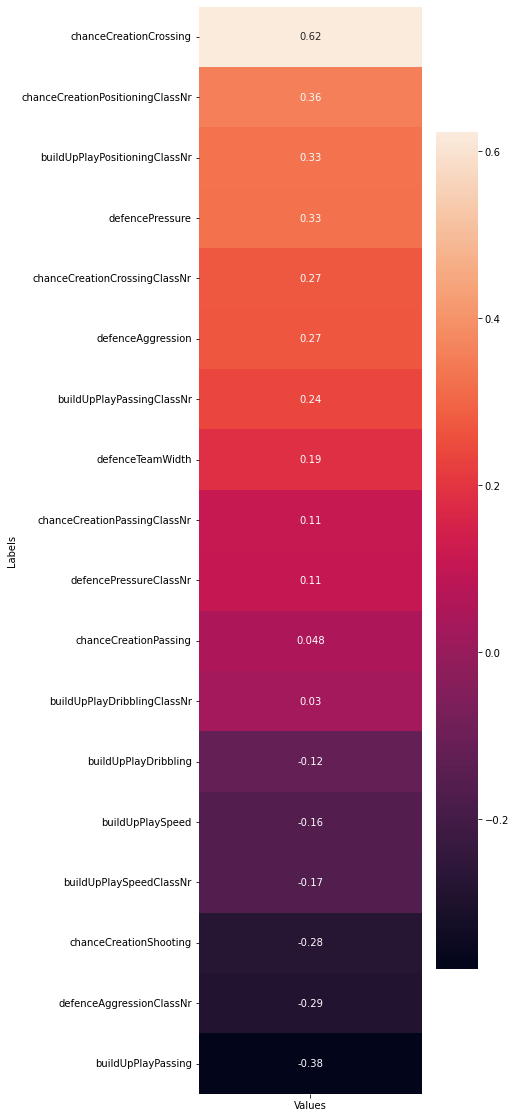

In [20]:
df1, df2 = analyse.get_att_corr(fd.team_att_df, datetime.strptime("2013-01-01", "%Y-%m-%d"), datetime.strptime("2015-01-01", "%Y-%m-%d"))

In [21]:
def top_5_heatmap_visualised(heatmap_df,df_attributes):
    """
    visualise the top 5 heatmap variables in the appropriate graphs
    """
    #change the index collumn to a normal one
    df6 = heatmap_df.reset_index()
    heatmap_variable=   df6['Labels']
    
    #make the appropriate amount of ghraps
    fig, axes = plt.subplots(3, 2, figsize=(20, 20))
    fig.suptitle("Positive Correlation")
    
    #checks if the amount of unique values is 2 or less to make a countplot if not it makes a regplot
    if len(set(df_attributes[heatmap_variable[0]])) <= 2 :
        sns.countplot(ax=axes[0,0],y=heatmap_variable[0],data=df_attributes,color = "pink",edgecolor="Black").set(ylabel=heatmap_variable[0],yticklabels=(['No', 'Yes']))
    else:
        sns.regplot(ax=axes[0,0],data=df_attributes,y = heatmap_variable[0],x = "Totale_punten",color = "purple",line_kws={"color":"red","linestyle":"-","lw":3},scatter_kws={"edgecolor":"white","alpha":0.5}).set(ylabel= heatmap_variable[0],xlabel='totale punten')
    if len(set(df_attributes[heatmap_variable[1]])) <= 2 :
        sns.countplot(ax=axes[0,1],y=heatmap_variable[1],data=df_attributes,color = "pink",edgecolor="Black").set(ylabel= heatmap_variable[1],yticklabels=(['No', 'Yes']))
    else:
        sns.regplot(ax=axes[0,1],data=df_attributes,y = heatmap_variable[1],x = "Totale_punten",color = "purple",line_kws={"color":"red","linestyle":"-","lw":3},scatter_kws={"edgecolor":"white","alpha":0.5}).set(ylabel= heatmap_variable[1],xlabel='totale punten')
    if len(set(df_attributes[heatmap_variable[2]])) <= 2 :
        sns.countplot(ax=axes[1,0],y=heatmap_variable[2],data=df_attributes,color = "pink",edgecolor="Black").set(ylabel=heatmap_variable[2],yticklabels=(['No', 'Yes']))
    else:
        sns.regplot(ax=axes[1,0],data=df_attributes,y = heatmap_variable[2],x = "Totale_punten",color = "purple",line_kws={"color":"red","linestyle":"-","lw":3},scatter_kws={"edgecolor":"white","alpha":0.5}).set(ylabel= heatmap_variable[2],xlabel='totale punten')
    if len(set(df_attributes[heatmap_variable[3]])) <= 2 :
        sns.countplot(ax=axes[1,1],y=heatmap_variable[3],data=df_attributes,color = "pink",edgecolor="Black").set(ylabel=heatmap_variable[3],yticklabels=(['No', 'Yes']))
    else:
        sns.regplot(ax=axes[1,1],data=df_attributes,y = heatmap_variable[3],x = "Totale_punten",color = "purple",line_kws={"color":"red","linestyle":"-","lw":3},scatter_kws={"edgecolor":"white","alpha":0.5}).set(ylabel= heatmap_variable[3],xlabel='totale punten')
    if len(set(df_attributes[heatmap_variable[4]])) <= 2 :
        sns.countplot(ax=axes[2,0],y=heatmap_variable[4],data=df_attributes,color = "pink",edgecolor="Black").set(ylabel=heatmap_variable[4],yticklabels=(['No', 'Yes']))
    else:
        sns.regplot(ax=axes[2,0],data=df_attributes,y = heatmap_variable[4],x = "Totale_punten",color = "purple",line_kws={"color":"red","linestyle":"-","lw":3},scatter_kws={"edgecolor":"white","alpha":0.5}).set(ylabel= heatmap_variable[4],xlabel='totale punten')

        plt.show()

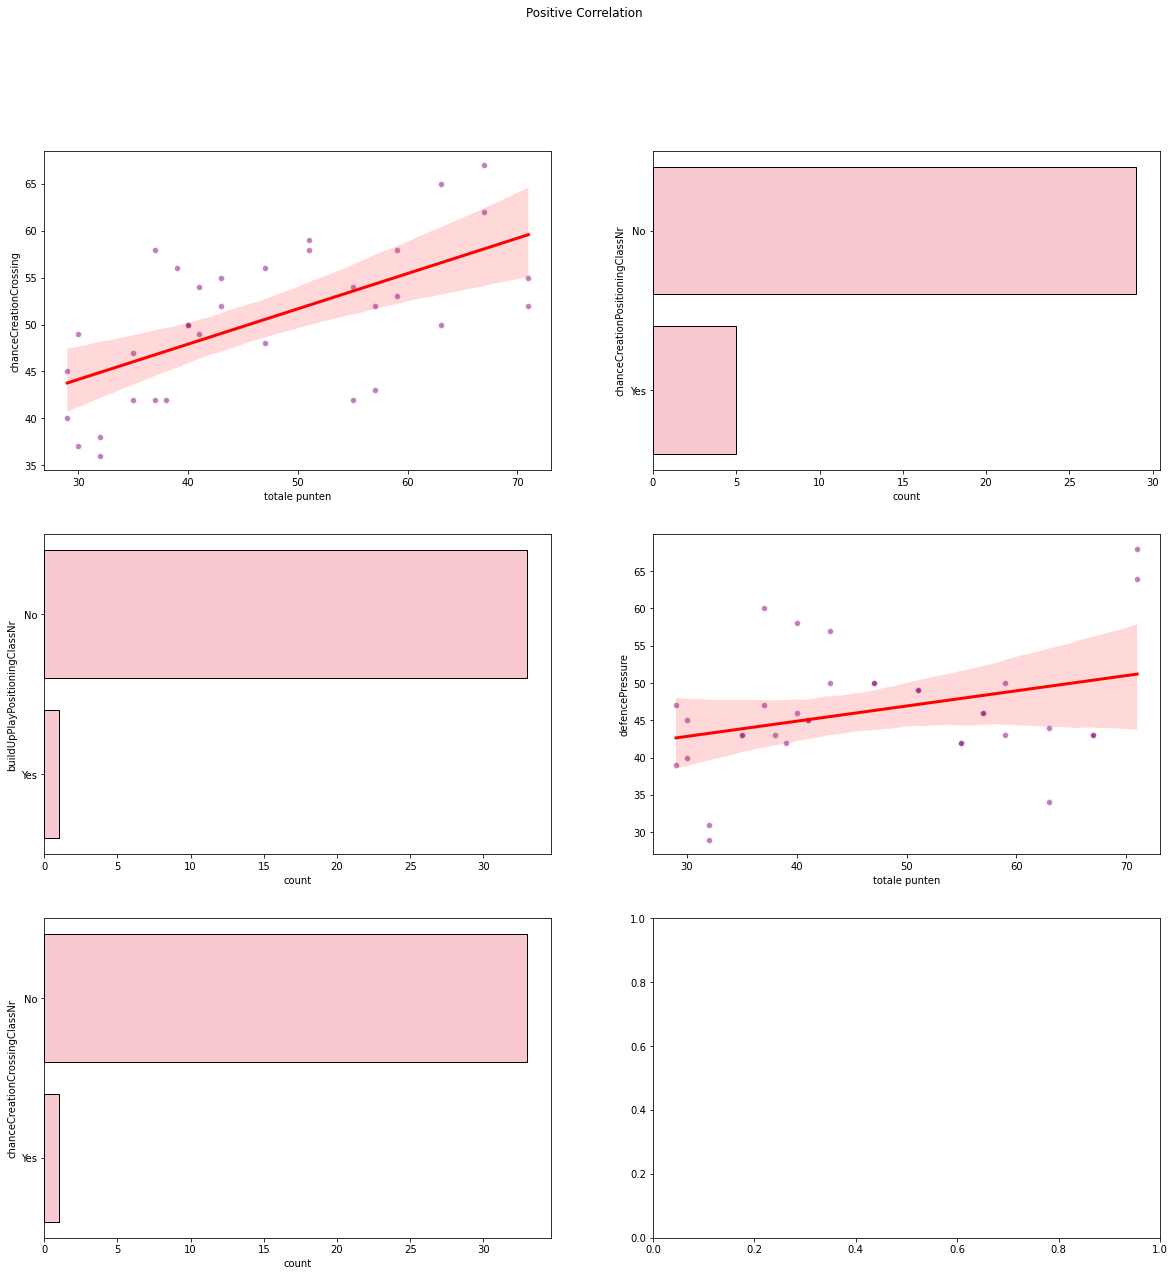

In [22]:
top_5_heatmap_visualised(df1,df2)

# Gemiddelde statistieken per speler

Hier worden de fifa statistieken per speler samengevoegd en het gemiddelde ervan berekend

In [23]:
player_att_df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [24]:
Average_att = player_att_df.groupby(['player_api_id']).mean()
column_names = ['crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'potential']
len(column_names)

34

In [25]:
Average_att['Total']= Average_att[column_names].sum(axis=1)
Average_att['Total2'] = Average_att['Total']/len(column_names)

In [26]:
Average_att = Average_att["Total2"]
Average_att

player_api_id
2625      51.630252
2752      45.298319
2768      49.317927
2770      55.421569
2790      57.282353
            ...    
744907    45.283422
746419    45.617647
748432    43.088235
750435    44.591503
750584    47.617647
Name: Total2, Length: 11060, dtype: float64

In [27]:
match_df = pd.read_sql_query("SELECT * FROM Match", cnx)

In [28]:
display(match_df.filter(like="player"))

,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,...,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0
25975,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,5.0,4.0,...,114792.0,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0
25976,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,...,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0
25977,1.0,2.0,4.0,6.0,8.0,3.0,7.0,5.0,3.0,5.0,...,121080.0,197757.0,260964.0,231614.0,113235.0,41116.0,462608.0,42262.0,92252.0,194532.0


# rating toevoegen aan match dataframe

Hier word de rating uit de player attributes toegevoegd aan de match dataframe

In [29]:
def match_with_ratings(rating,kolumnaam):
    players = player_att_df.groupby(['player_api_id']).mean().round(0).reset_index()
    player_rating_dict = dict(zip(players["player_api_id"], players[rating]))
    columns = ["home_player_" + str(i) for i in range(1, 12)] + ["away_player_" + str(i) for i in range(1, 12)]
    
    for col in columns:
        col_name = col + kolumnaam
        match_df[col_name] = [player_rating_dict.get(i, None) for i in match_df[col]]
    return match_df
display(match_with_ratings('overall_rating',"_rating"))
import seaborn as sns

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,53.0,60.0,56.0,60.0,63.0,63.0,65.0,63.0,60.0,67.0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,58.0,66.0,64.0,65.0,52.0,59.0,63.0,66.0,64.0,70.0
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,61.0,61.0,72.0,61.0,62.0,68.0,65.0,69.0,58.0,68.0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,61.0,62.0,57.0,55.0,60.0,74.0,58.0,70.0,66.0,63.0


,home_team_api_id,id,country_id,league_id,stage,match_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating,Home_total,home_avg,team_name
0,1601,17525.200000,15722.0,15722.0,14.0,1.994724e+06,18337.866667,1.333333,1.733333,1.0,...,61.933333,62.733333,61.400000,61.666667,61.400000,62.800000,62.666667,673.333333,61.212121,CHO
1,1773,1610.200000,1.0,1.0,16.0,1.979964e+06,27021.400000,1.533333,1.466667,1.0,...,64.666667,67.200000,67.733333,66.866667,66.933333,66.533333,66.866667,719.250000,65.386364,O-H
2,1957,17526.733333,15722.0,15722.0,15.0,1.994730e+06,18314.133333,1.066667,1.466667,1.0,...,61.600000,62.133333,60.200000,63.857143,61.666667,64.285714,62.857143,668.166667,60.742424,BIA
3,2182,17519.000000,15722.0,15722.0,15.0,1.994733e+06,18299.133333,1.333333,1.133333,1.0,...,62.533333,62.066667,62.200000,60.333333,62.266667,61.866667,62.285714,715.666667,65.060606,POZ
4,2186,17513.400000,15722.0,15722.0,15.0,1.994732e+06,18298.866667,2.266667,1.266667,1.0,...,62.066667,61.200000,61.000000,61.666667,62.733333,62.400000,62.714286,675.733333,61.430303,CKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,158085,19538.529412,17642.0,17642.0,18.0,2.015964e+06,19510.823529,1.647059,1.058824,1.0,...,68.235294,68.764706,68.411765,68.529412,70.058824,69.823529,68.764706,742.181818,67.471074,ARO
184,177361,17526.733333,15722.0,15722.0,16.0,1.994739e+06,6620.533333,1.400000,1.266667,1.0,...,62.133333,63.933333,61.200000,62.642857,63.133333,61.928571,64.428571,663.333333,60.303030,TBN
185,188163,19541.058824,17642.0,17642.0,17.0,2.015958e+06,17741.529412,0.882353,1.529412,1.0,...,68.117647,68.823529,68.562500,68.352941,69.470588,70.647059,68.062500,717.500000,65.227273,TON
186,208931,13091.000000,10257.0,10257.0,19.0,2.060450e+06,9102.157895,1.210526,1.368421,1.0,...,69.421053,73.000000,71.368421,72.789474,73.789474,74.526316,74.111111,748.076923,68.006993,CAP


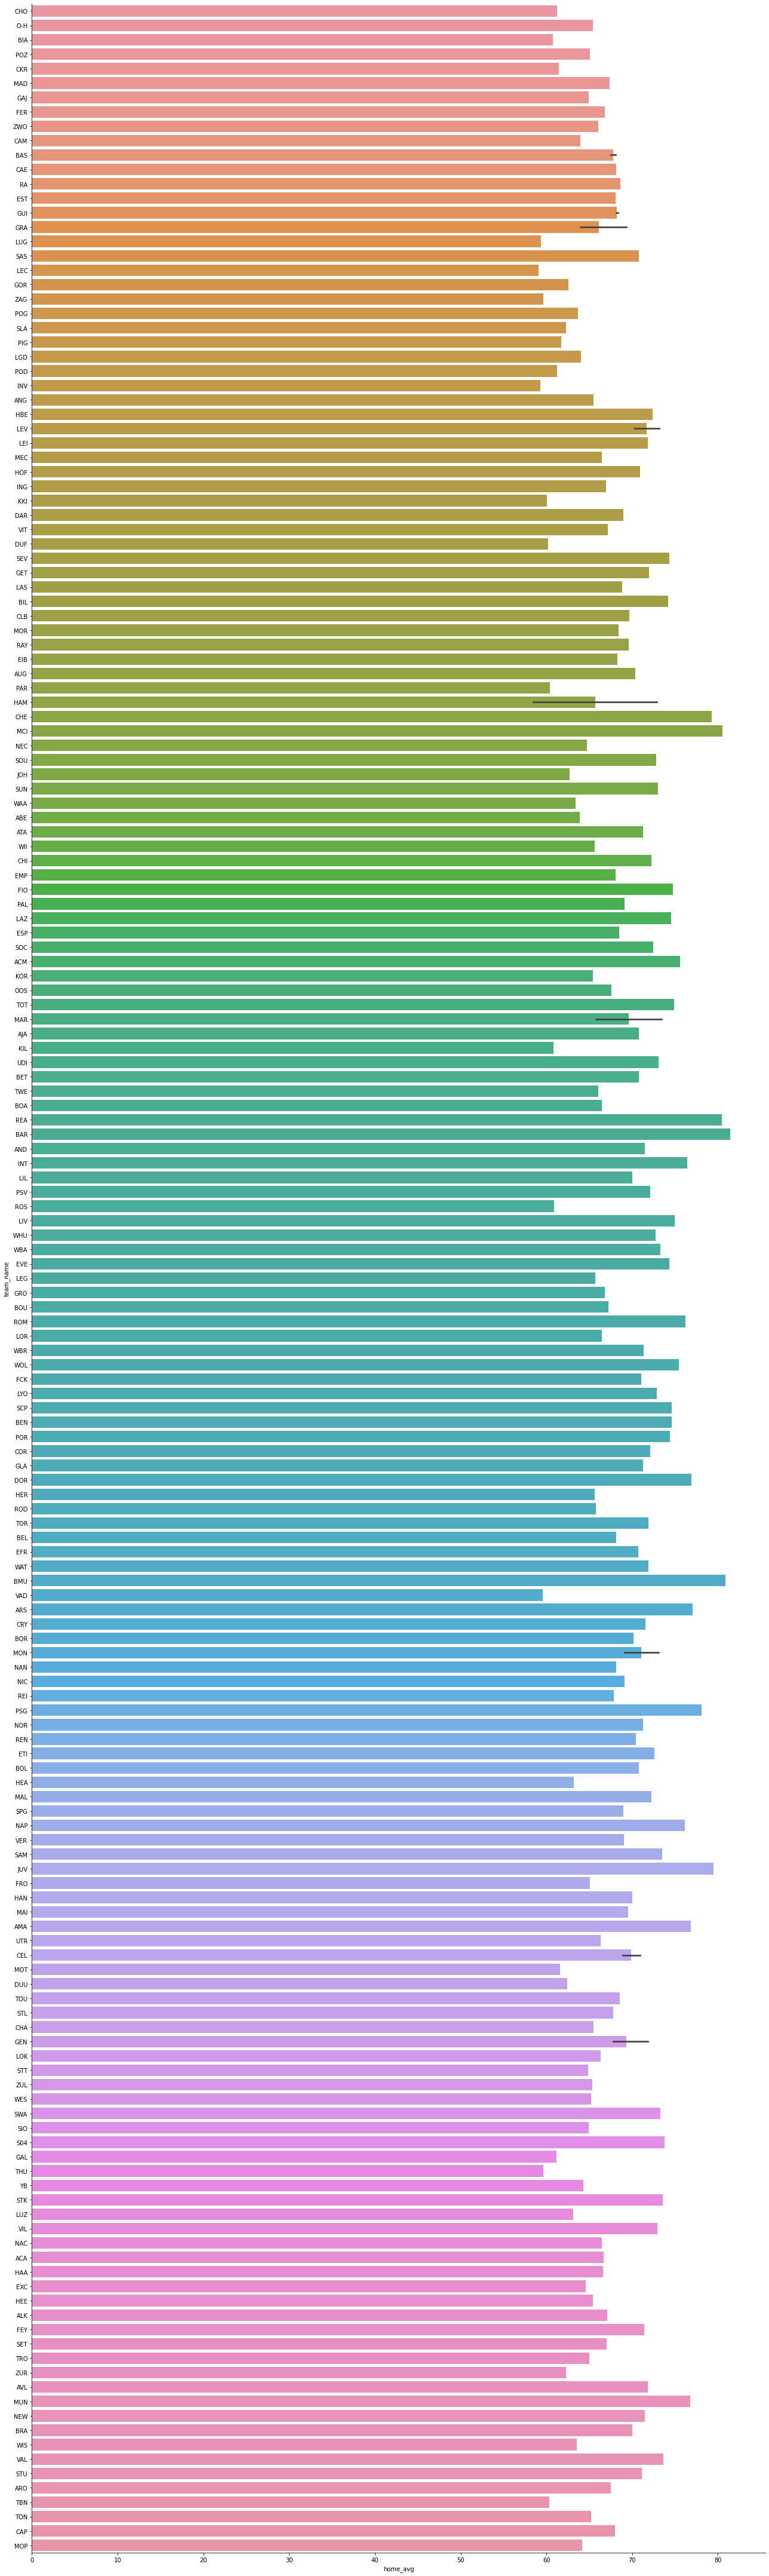

In [92]:
# Team, seizoen, league, ratings
def team_name (test):
    team_df.loc[(team_df['team_api_id'] == test)]['team_short_name'].values[0]
def Histoyo (rating,season):
    columns_home = ["home_player_" + str(i) + rating for i in range(1, 12)]
    match_df2 = match_df.loc[(match_df['season'] == season)].copy()
    val = 0
    for col in columns_home:
        val += match_df2[col]
    
    match_df2['Home_total'] = val
    match_df2['team_name'] = pd.merge(match_df2, team_df, left_on =match_df2['home_team_api_id'], right_on = team_df['team_api_id'])['team_short_name']

    match_df2= match_df2.groupby(['home_team_api_id']).mean().reset_index()
    
    match_df2['home_avg'] = (match_df2['Home_total']/11)
    match_df2['team_name'] = pd.merge(match_df2, team_df, left_on =match_df2['home_team_api_id'], right_on = team_df['team_api_id'])['team_short_name']

    
    #home_df= pd.DataFrame(match_df2['home_avg'],match_df2['home_team_api_id']).copy()
    
    #home_df= home_df.groupby(['home_team_api_id']).mean().reset_index()
    #home_df['team_name'] = pd.merge(home_df, team_df, left_on =home_df['home_team_api_id'], right_on = team_df['team_api_id'])['team_long_name']
    #home_df = home_df.drop(columns='home_team_api_id')
    #home_df = home_df.sort_values('home_avg')
    sns.catplot(y='team_name',x='home_avg',data=match_df2,kind='bar',  height=60, aspect=0.3)
    return match_df2
Histoyo("_rating",'2015/2016')

<Figure size 720x432 with 0 Axes>

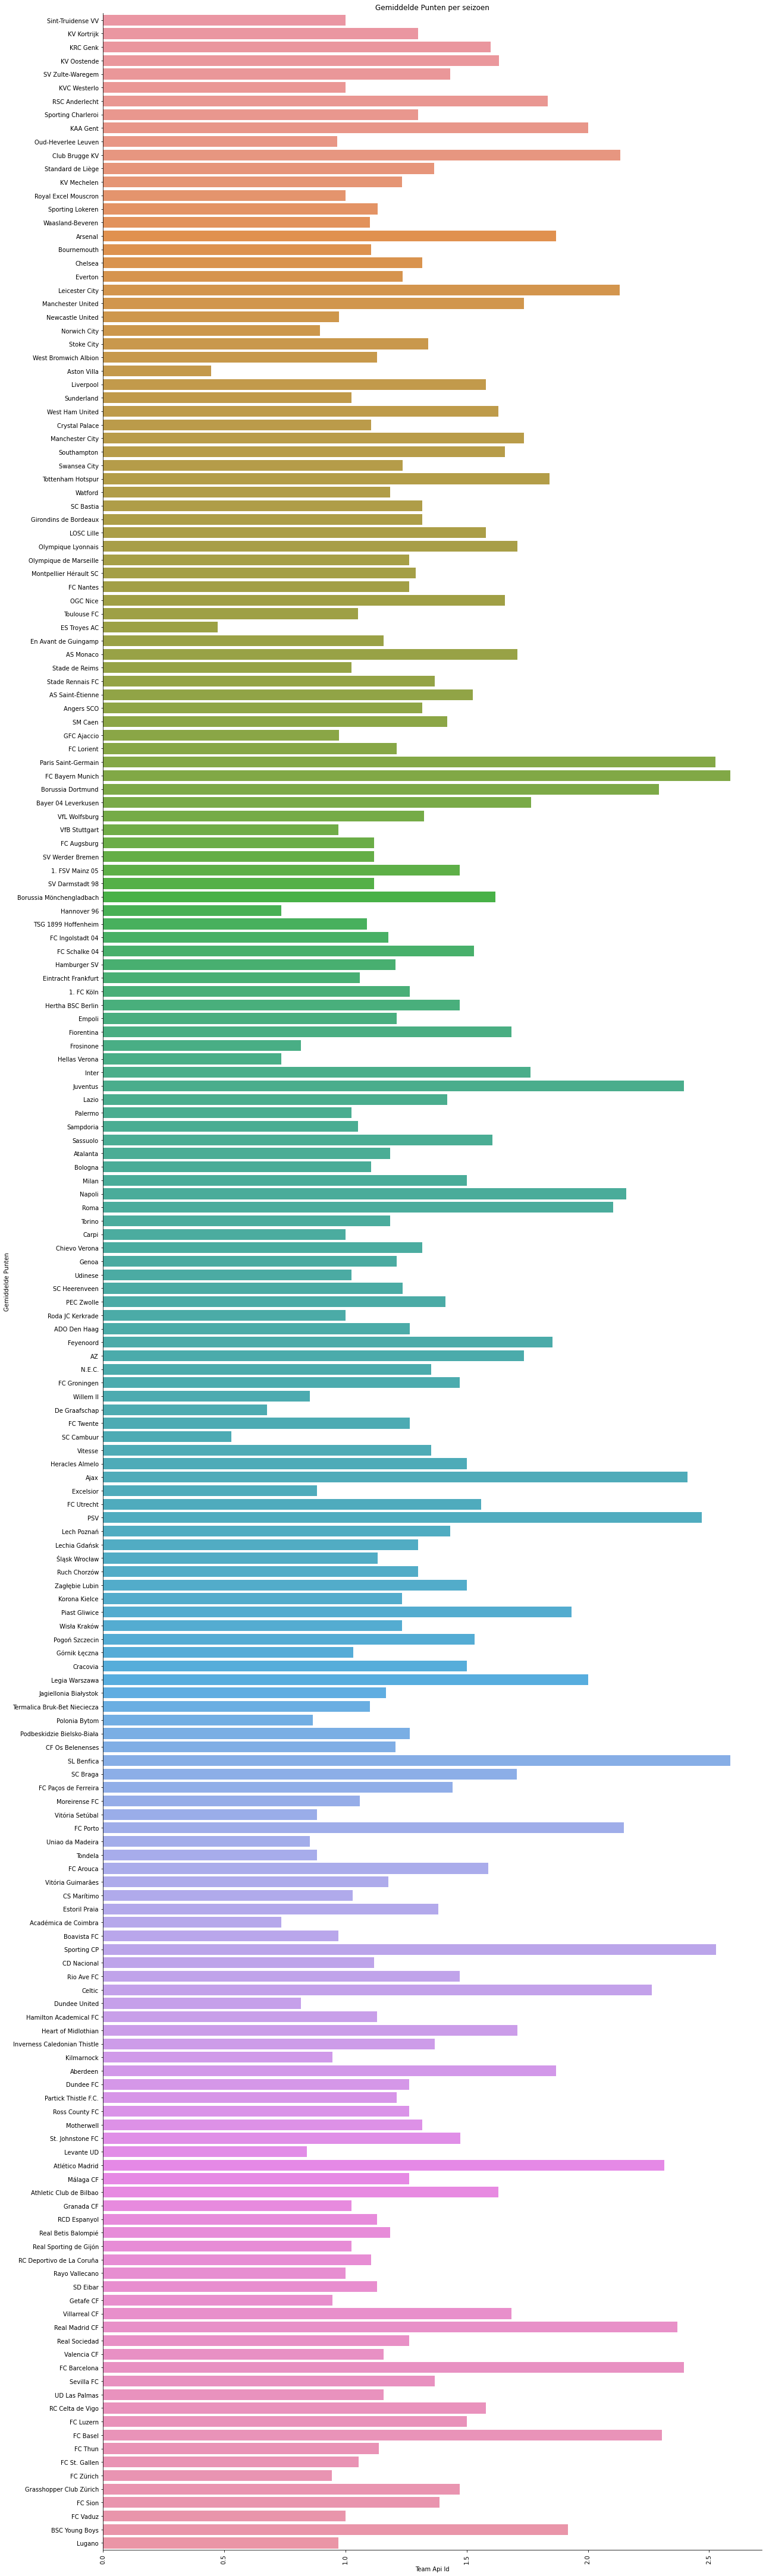

,team_api_id,gemiddelde,team_name
0,9997,1.000000,Sint-Truidense VV
1,8571,1.300000,KV Kortrijk
2,9987,1.600000,KRC Genk
3,8573,1.633333,KV Oostende
4,10000,1.433333,SV Zulte-Waregem
...,...,...,...
183,9956,1.472222,Grasshopper Club Zürich
184,10179,1.388889,FC Sion
185,9824,1.000000,FC Vaduz
186,10192,1.916667,BSC Young Boys


In [93]:
def teamseason(season):
    season_loc = match_df.loc[(match_df['season'] == season)]
    league_team_list = season_loc["home_team_api_id"].unique().tolist()
    
    #make new dataframe for visuals
    visualise_df=pd.DataFrame()
    visualise_df['team_api_id'] = league_team_list
    gem_punten = []
    # Set figure size
    plt.figure(figsize=(10, 6))
    
    #for loop to get data from each team in the season
    for team_id in league_team_list:
        # run your code for each value in the list
        result10 = match_df.loc[(match_df['away_team_api_id'] == team_id)& (match_df['season'] == season)  | (match_df['home_team_api_id'] == team_id) & (match_df['season'] == season)]
    
        home = result10.loc[(match_df['home_team_api_id'] == team_id)& (result10['season'] == season)].copy()
        away= result10.loc[(match_df['away_team_api_id'] == team_id)& (result10['season'] == season)].copy()
        home['punten'] = np.where(home['home_team_goal'] > home['away_team_goal'], 3, np.where(home['home_team_goal'] == home['away_team_goal'], 1, 0)).copy()
        away['punten'] = np.where(away['home_team_goal'] < away['away_team_goal'], 3, np.where(away['home_team_goal'] == away['away_team_goal'], 1, 0)).copy()
        
        aantal_wed= len(home) + len(away)
        awaysum = away['punten'].sum()
        homesum = home['punten'].sum()
        total_punten = awaysum + homesum
        
        gem_punten.append(total_punten/aantal_wed)
    
    visualise_df['gemiddelde'] = pd.Series(gem_punten).values
    visualise_df['team_name'] = pd.merge(visualise_df, team_df, left_on =visualise_df['team_api_id'], right_on = team_df['team_api_id'])['team_long_name']

    #barplot to visualise the data
    sns.catplot(y="team_name", x="gemiddelde",kind='bar', data=visualise_df,  height=60, aspect=0.3)
    plt.xlabel("Team Api Id")
    plt.ylabel("Gemiddelde Punten")
    plt.title("Gemiddelde Punten per seizoen")
    plt.xticks(rotation=90)
    plt.show()
    return visualise_df
teamseason('2015/2016')

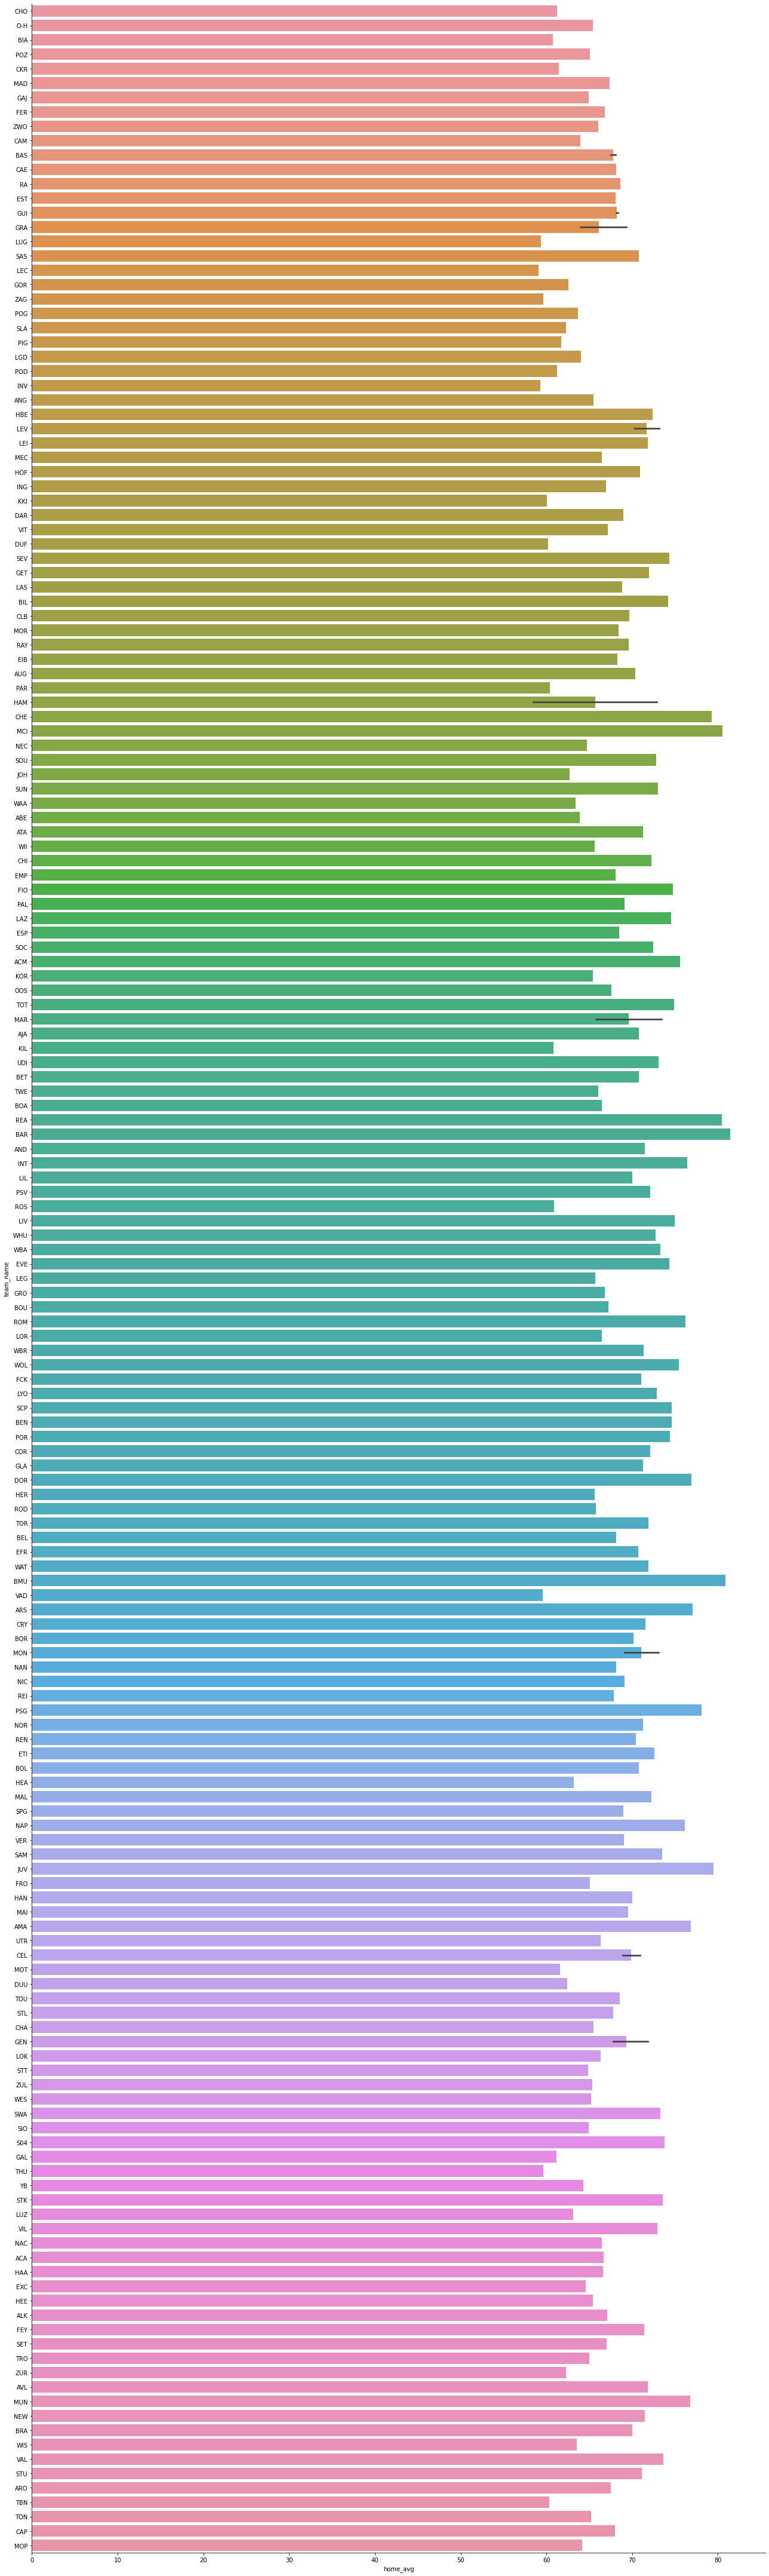

<Figure size 720x432 with 0 Axes>

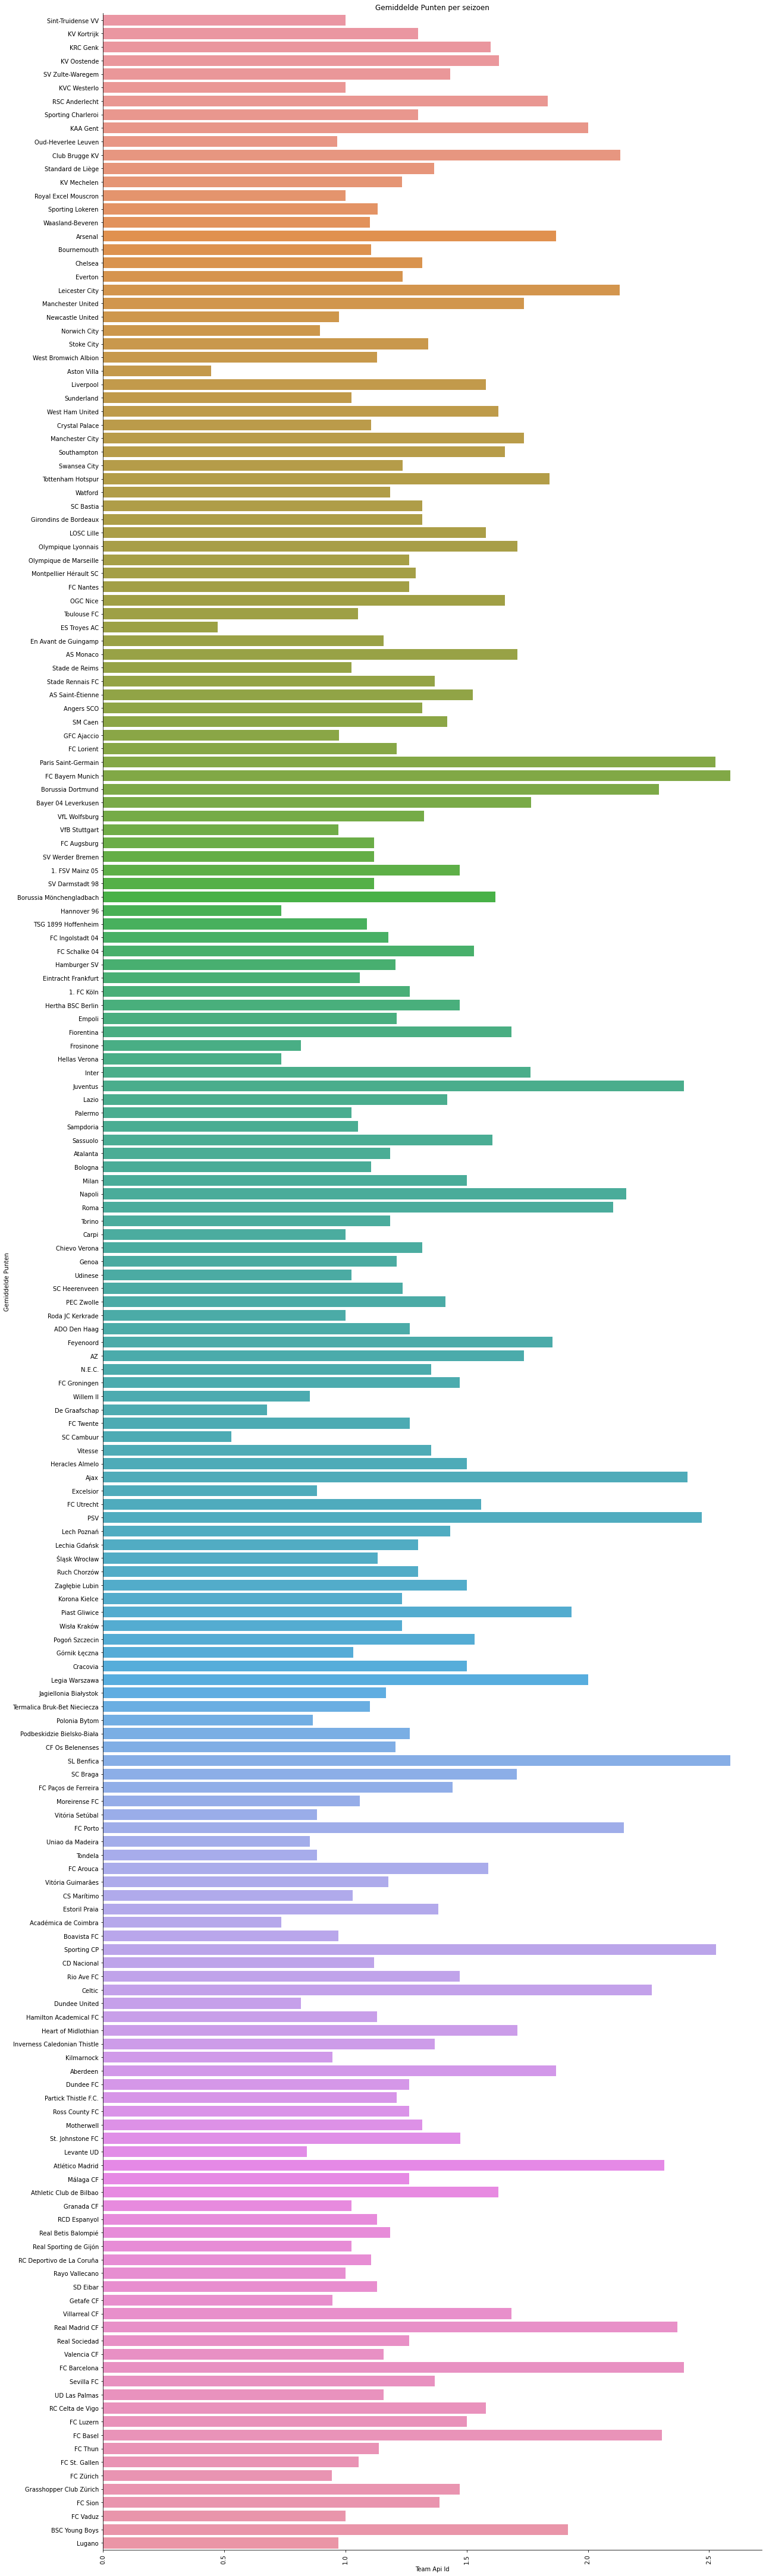

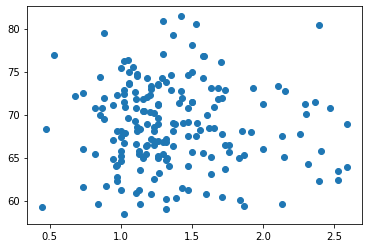

In [101]:
def scatter(rating,year):
    x = Histoyo(rating,year)
    y = teamseason(year)
    return plt.scatter(y=x["home_avg"], x=y["gemiddelde"])
scatter('_rating', '2015/2016')

,home_team_api_id,id,country_id,league_id,stage,match_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,away_player_5_penal,away_player_6_penal,away_player_7_penal,away_player_8_penal,away_player_9_penal,away_player_10_penal,away_player_11_penal,Home_total,home_avg,team_name
0,1601,17525.200000,15722.0,15722.0,14.0,1.994724e+06,18337.866667,1.333333,1.733333,1.0,...,46.866667,50.733333,48.000000,55.066667,56.666667,56.933333,58.866667,510.866667,46.442424,CHO
1,1773,1610.200000,1.0,1.0,16.0,1.979964e+06,27021.400000,1.533333,1.466667,1.0,...,46.600000,60.266667,57.466667,56.133333,59.533333,59.066667,60.466667,580.750000,52.795455,O-H
2,1957,17526.733333,15722.0,15722.0,15.0,1.994730e+06,18314.133333,1.066667,1.466667,1.0,...,46.133333,49.000000,48.133333,56.714286,54.666667,57.142857,61.500000,543.250000,49.386364,BIA
3,2182,17519.000000,15722.0,15722.0,15.0,1.994733e+06,18299.133333,1.333333,1.133333,1.0,...,48.600000,47.066667,46.733333,52.400000,54.533333,56.933333,58.000000,537.933333,48.903030,POZ
4,2186,17513.400000,15722.0,15722.0,15.0,1.994732e+06,18298.866667,2.266667,1.266667,1.0,...,48.533333,49.200000,46.200000,54.600000,55.666667,56.333333,63.785714,510.733333,46.430303,CKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,158085,19538.529412,17642.0,17642.0,18.0,2.015964e+06,19510.823529,1.647059,1.058824,1.0,...,51.000000,58.058824,57.352941,56.294118,62.176471,68.058824,64.058824,602.272727,54.752066,ARO
184,177361,17526.733333,15722.0,15722.0,16.0,1.994739e+06,6620.533333,1.400000,1.266667,1.0,...,49.333333,50.733333,47.600000,53.642857,60.666667,57.142857,58.142857,523.400000,47.581818,TBN
185,188163,19541.058824,17642.0,17642.0,17.0,2.015958e+06,17741.529412,0.882353,1.529412,1.0,...,50.941176,57.882353,50.875000,54.705882,61.176471,65.117647,66.562500,558.166667,50.742424,TON
186,208931,13091.000000,10257.0,10257.0,19.0,2.060450e+06,9102.157895,1.210526,1.368421,1.0,...,49.421053,58.473684,60.736842,61.421053,65.263158,71.315789,66.833333,558.923077,50.811189,CAP


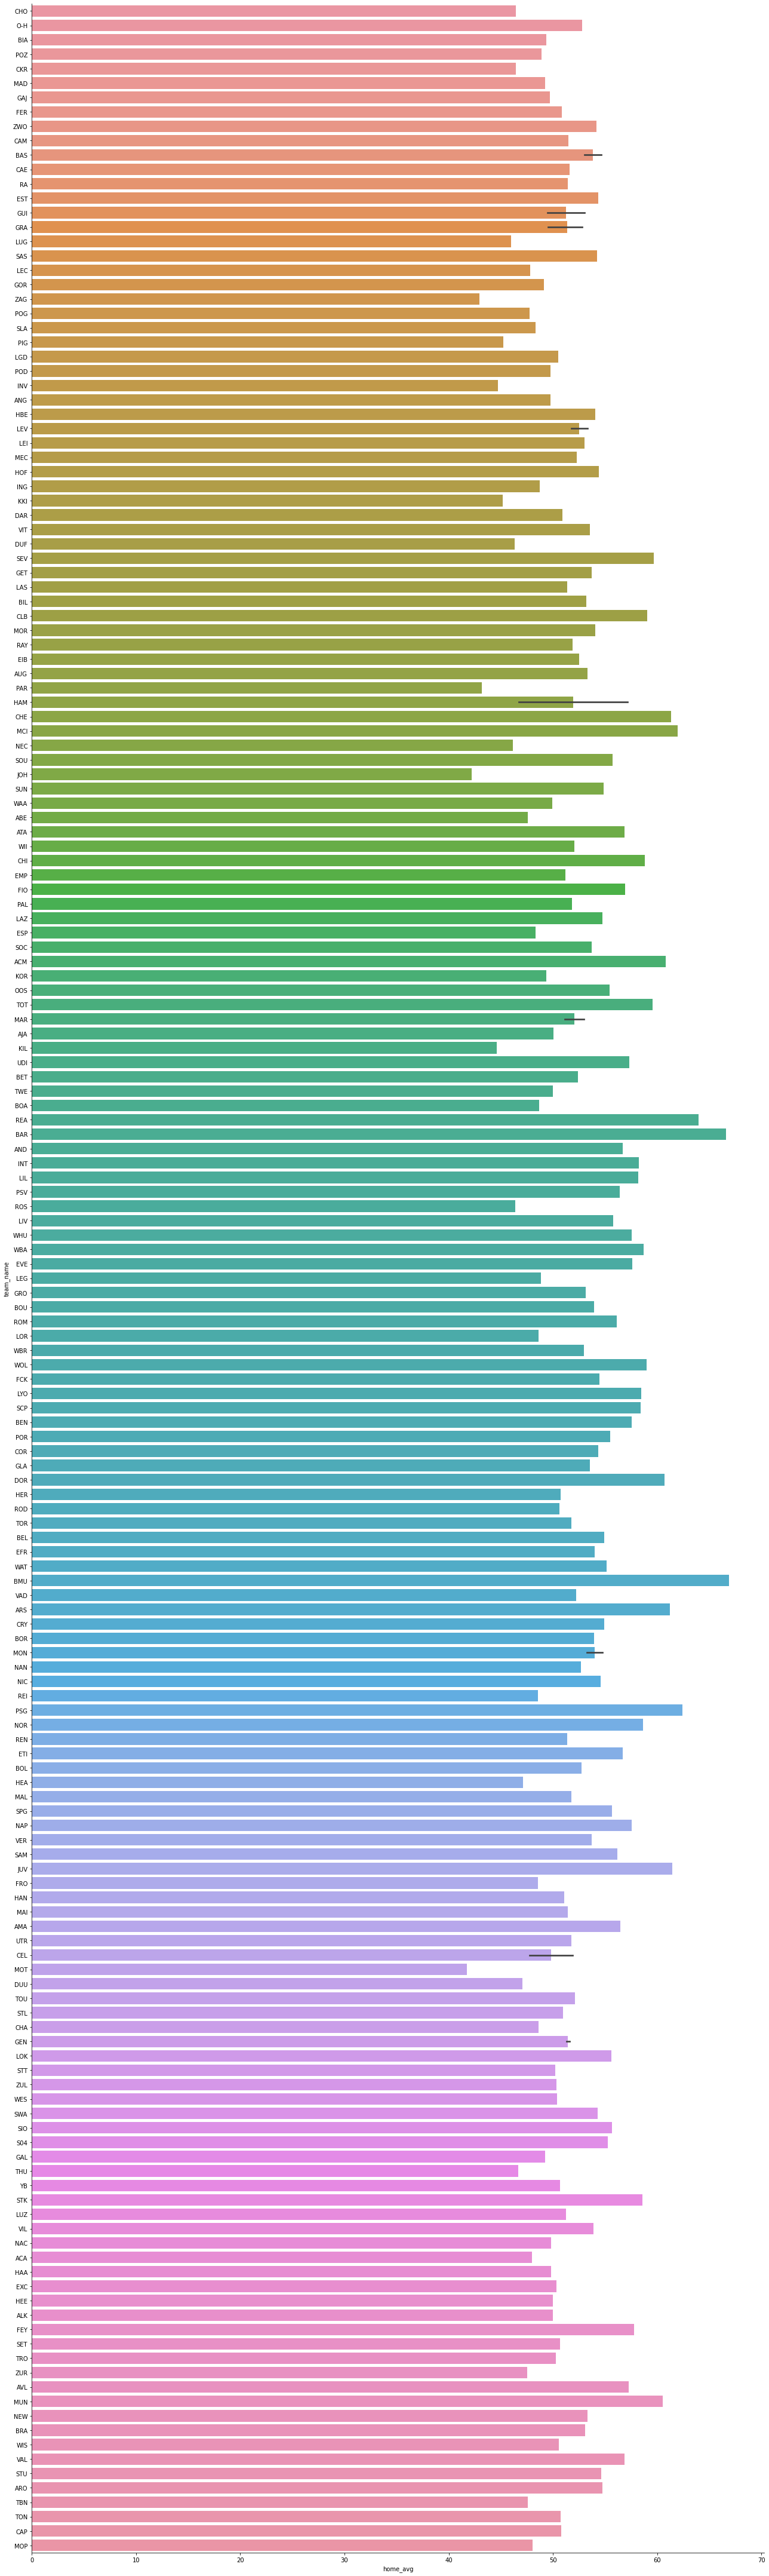

In [100]:
match_with_ratings('penalties',"_penal")
Histoyo("_penal",'2015/2016')


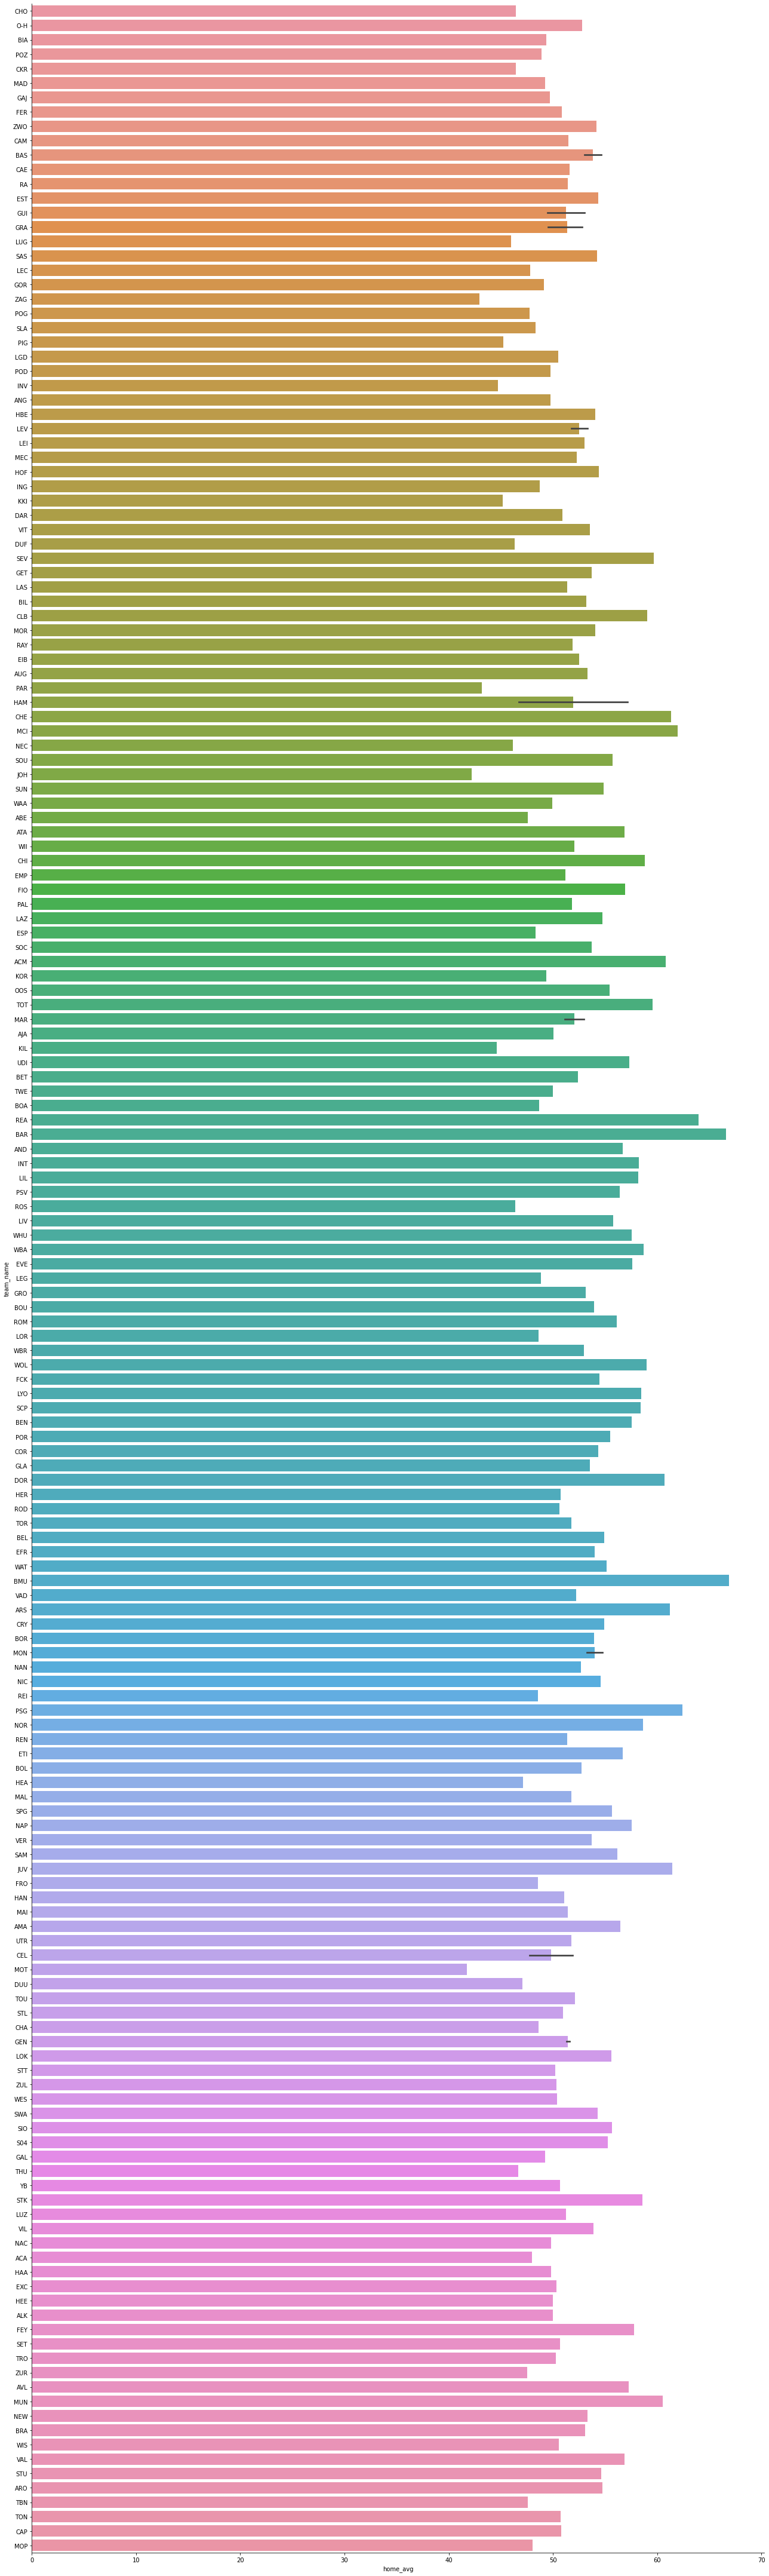

<Figure size 720x432 with 0 Axes>

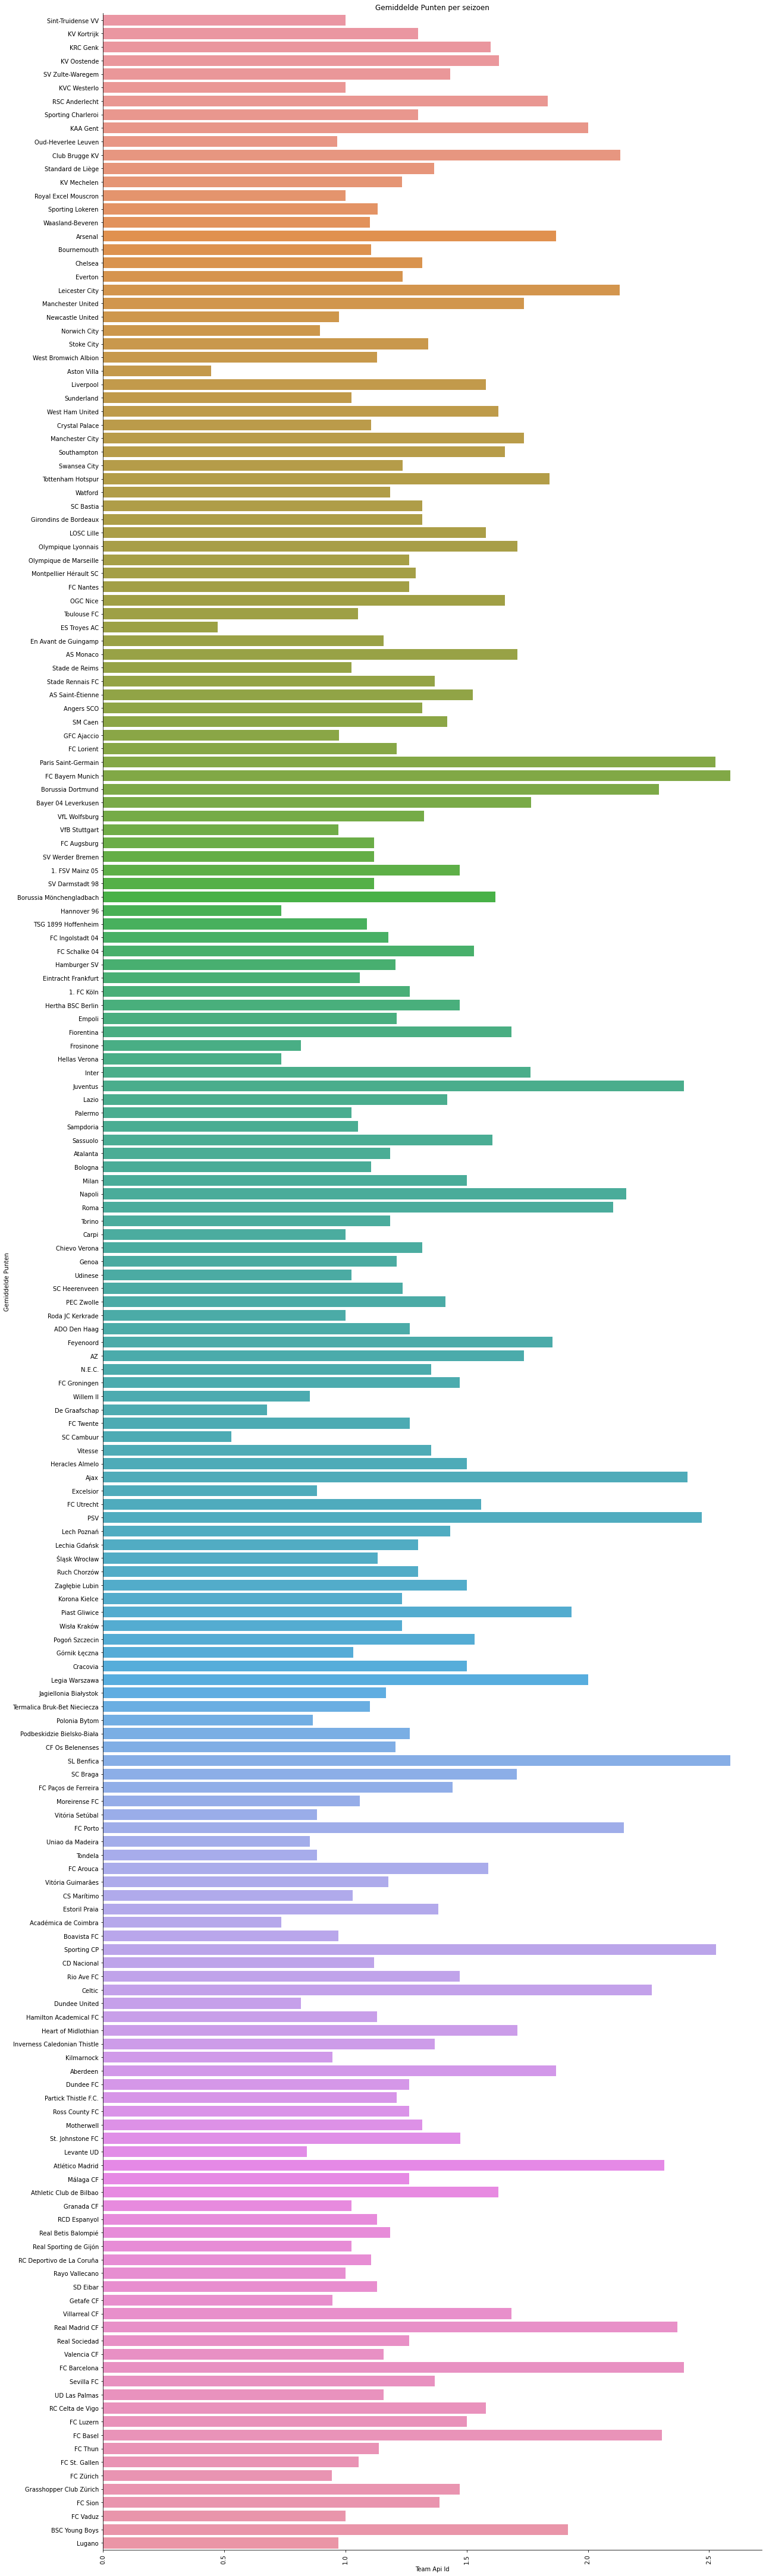

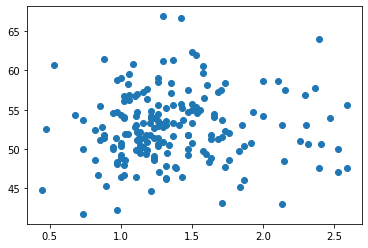

In [102]:
scatter('_penal','2015/2016')

,home_team_api_id,id,country_id,league_id,stage,match_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,away_player_5_diving,away_player_6_diving,away_player_7_diving,away_player_8_diving,away_player_9_diving,away_player_10_diving,away_player_11_diving,Home_total,home_avg,team_name
0,1601,17525.200000,15722.0,15722.0,14.0,1.994724e+06,18337.866667,1.333333,1.733333,1.0,...,10.200000,10.600000,10.333333,10.000000,10.600000,10.733333,11.266667,183.400000,16.672727,CHO
1,1773,1610.200000,1.0,1.0,16.0,1.979964e+06,27021.400000,1.533333,1.466667,1.0,...,10.266667,9.600000,9.800000,10.400000,11.200000,9.200000,9.733333,171.875000,15.625000,O-H
2,1957,17526.733333,15722.0,15722.0,15.0,1.994730e+06,18314.133333,1.066667,1.466667,1.0,...,10.133333,9.800000,10.200000,10.571429,10.866667,10.142857,10.785714,164.000000,14.909091,BIA
3,2182,17519.000000,15722.0,15722.0,15.0,1.994733e+06,18299.133333,1.333333,1.133333,1.0,...,10.800000,11.066667,9.533333,9.800000,9.400000,10.133333,11.000000,165.466667,15.042424,POZ
4,2186,17513.400000,15722.0,15722.0,15.0,1.994732e+06,18298.866667,2.266667,1.266667,1.0,...,10.266667,11.000000,10.466667,11.400000,11.333333,10.466667,11.642857,153.600000,13.963636,CKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,158085,19538.529412,17642.0,17642.0,18.0,2.015964e+06,19510.823529,1.647059,1.058824,1.0,...,9.470588,10.705882,10.235294,9.529412,10.117647,9.941176,10.882353,169.090909,15.371901,ARO
184,177361,17526.733333,15722.0,15722.0,16.0,1.994739e+06,6620.533333,1.400000,1.266667,1.0,...,10.400000,10.800000,10.733333,10.714286,10.733333,9.357143,10.214286,173.066667,15.733333,TBN
185,188163,19541.058824,17642.0,17642.0,17.0,2.015958e+06,17741.529412,0.882353,1.529412,1.0,...,8.882353,10.470588,11.187500,8.411765,9.411765,10.588235,9.562500,167.666667,15.242424,TON
186,208931,13091.000000,10257.0,10257.0,19.0,2.060450e+06,9102.157895,1.210526,1.368421,1.0,...,9.842105,11.263158,10.315789,8.894737,9.210526,9.421053,10.222222,171.769231,15.615385,CAP


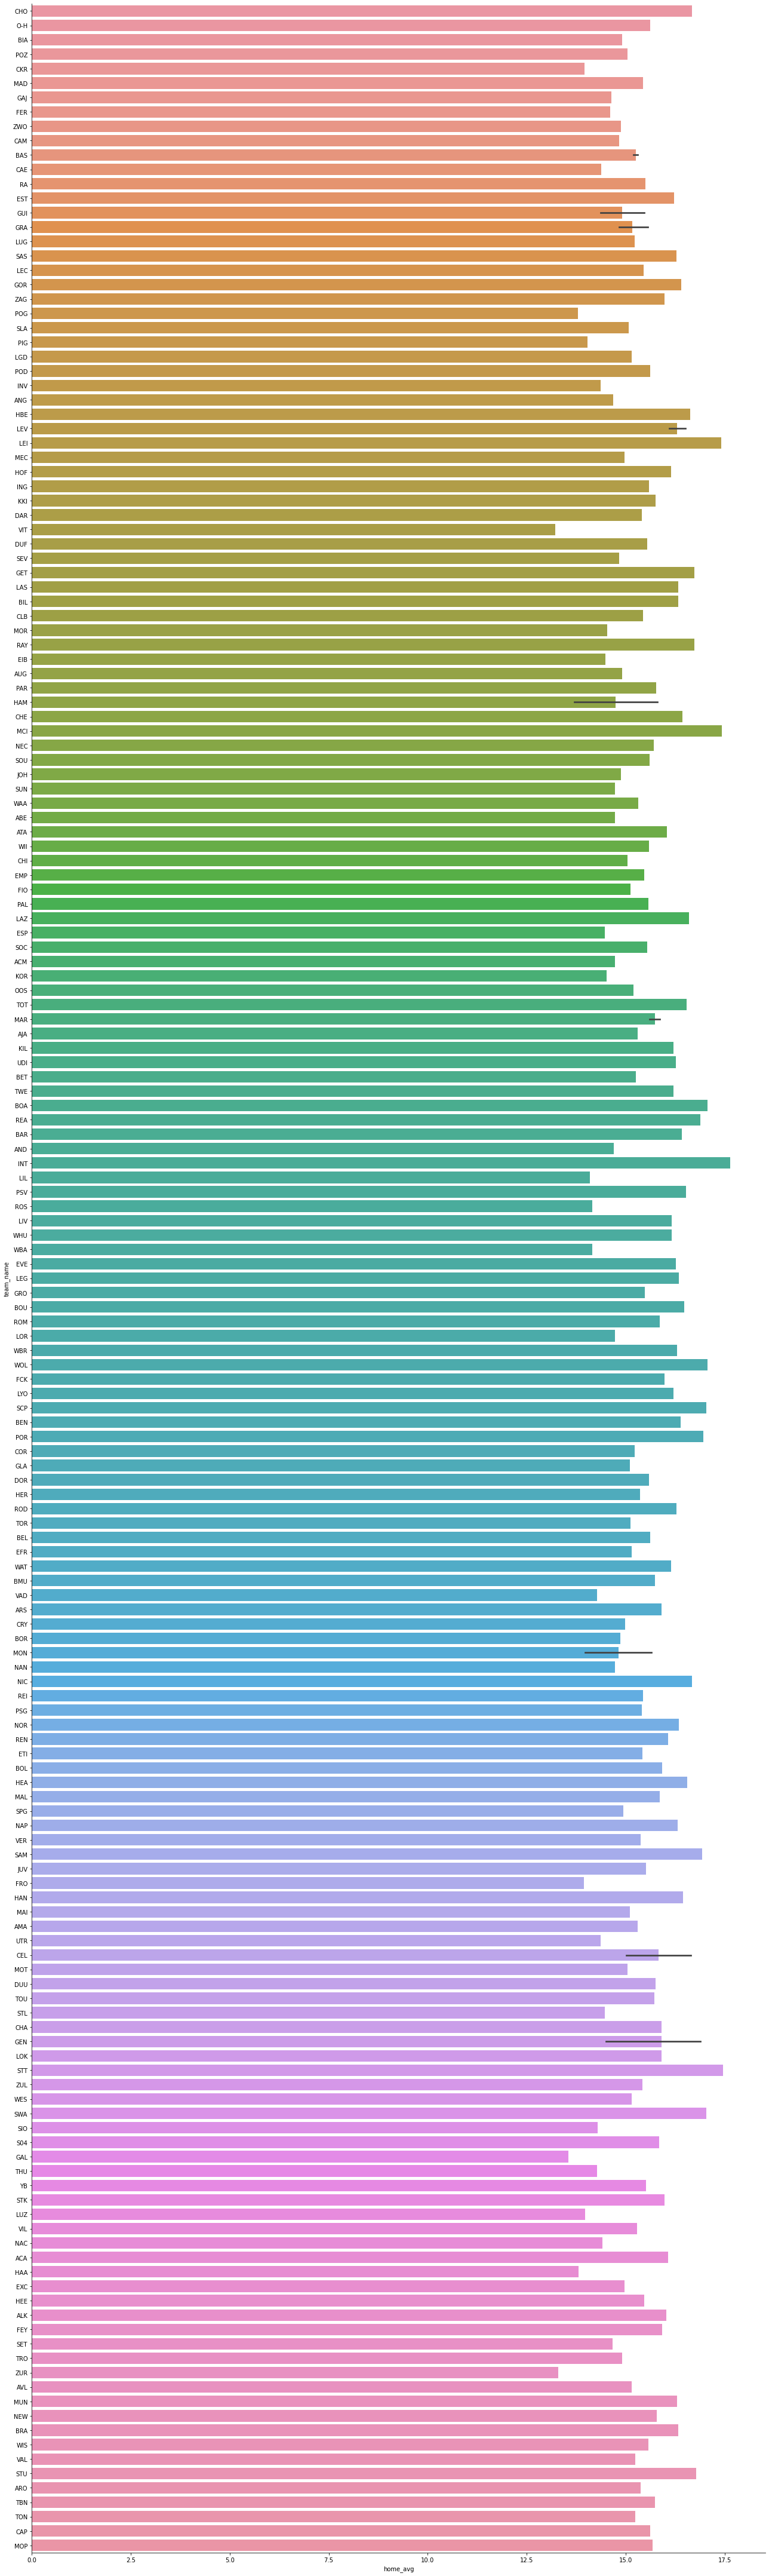

In [103]:
match_with_ratings('gk_diving',"_diving")
Histoyo("_diving",'2015/2016')


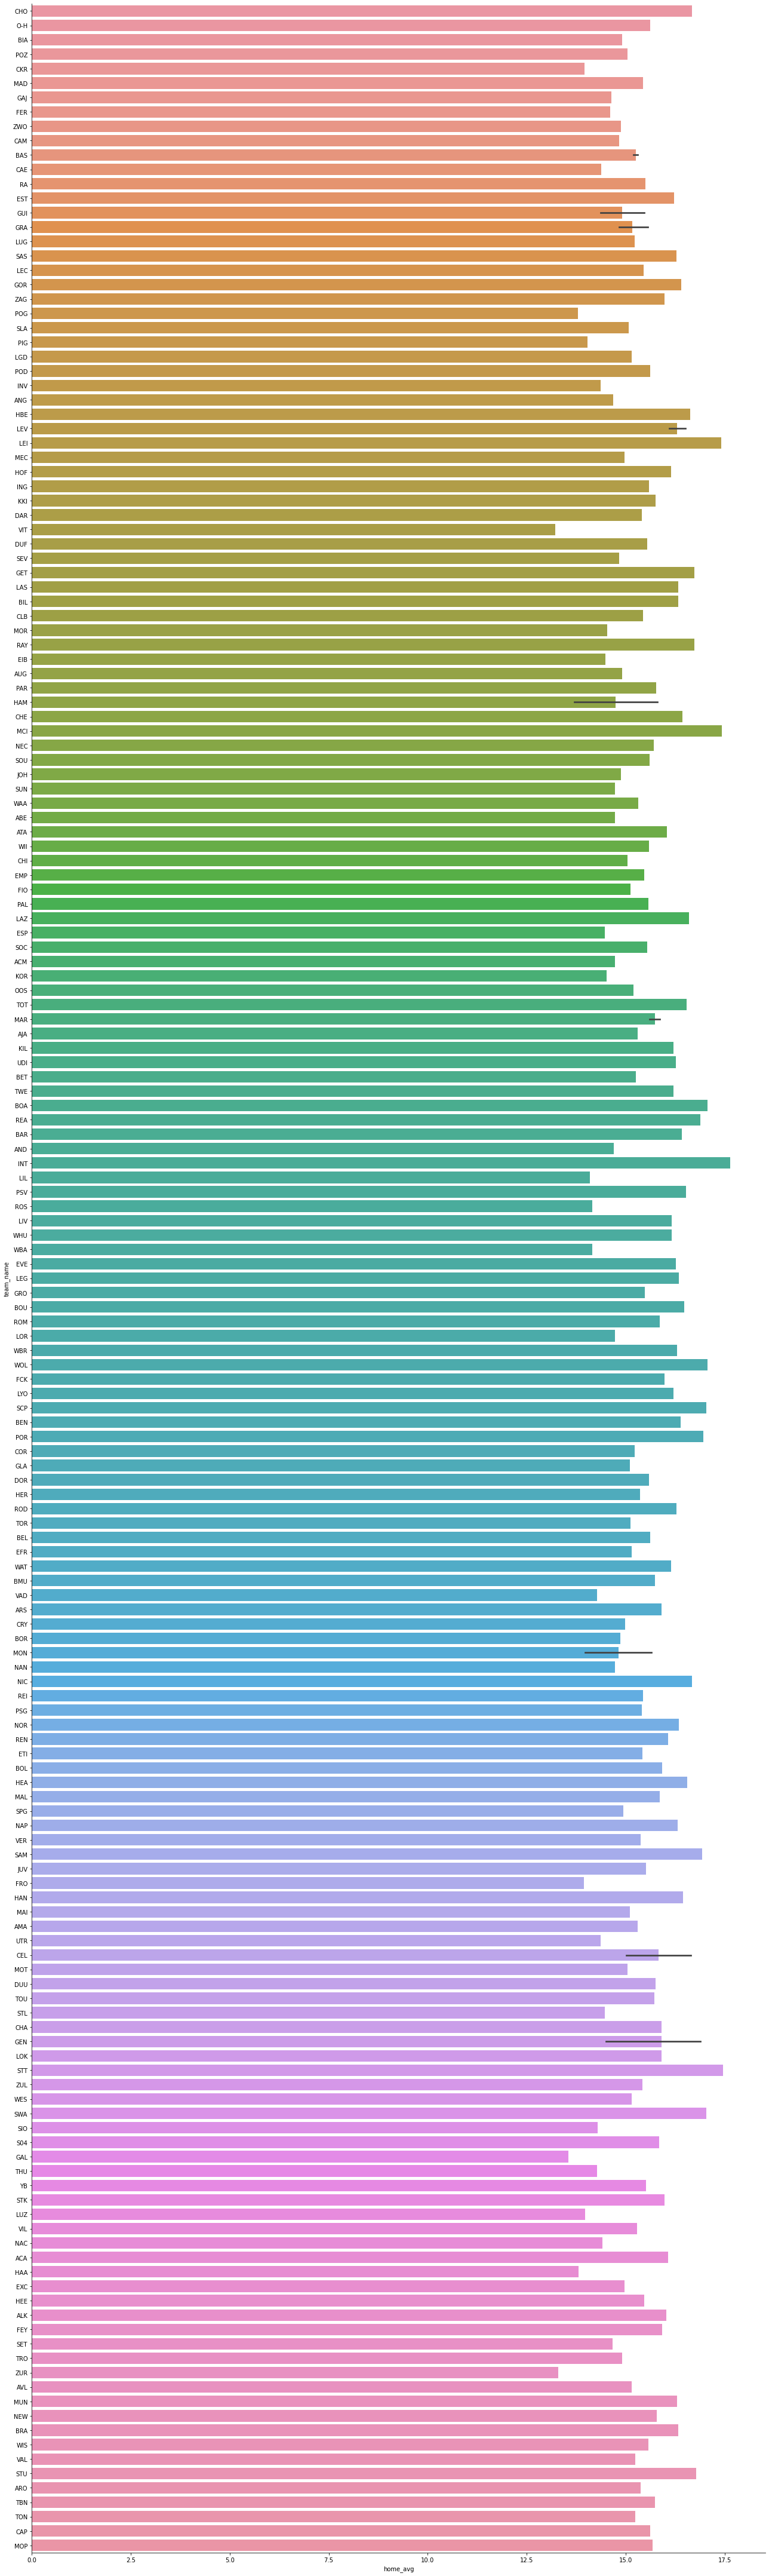

<Figure size 720x432 with 0 Axes>

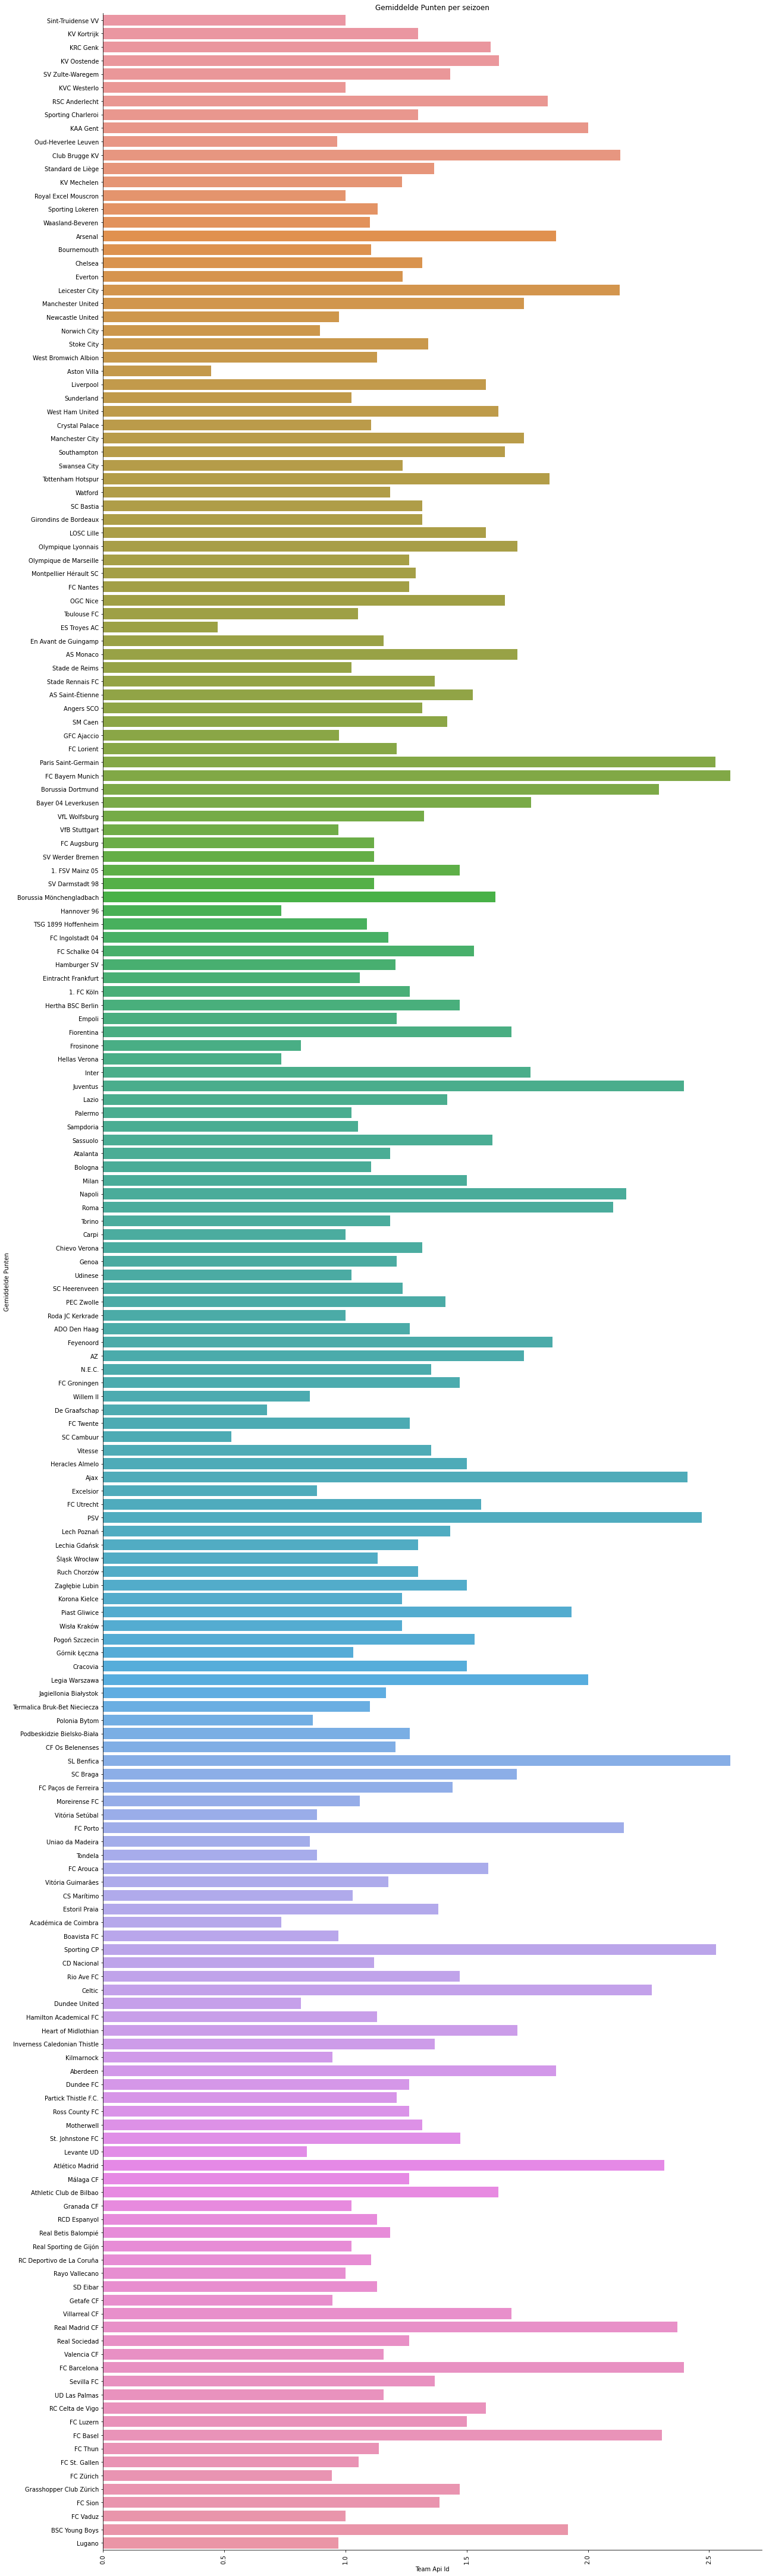

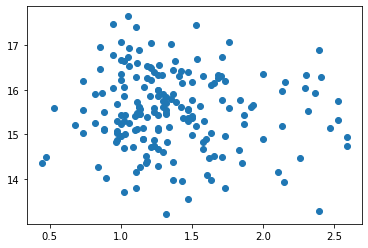

In [104]:
scatter('_diving','2015/2016')

,home_team_api_id,id,country_id,league_id,stage,match_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,away_player_5_interception,away_player_6_interception,away_player_7_interception,away_player_8_interception,away_player_9_interception,away_player_10_interception,away_player_11_interception,Home_total,home_avg,team_name
0,1601,17525.200000,15722.0,15722.0,14.0,1.994724e+06,18337.866667,1.333333,1.733333,1.0,...,61.333333,56.466667,57.000000,45.600000,41.933333,39.800000,36.000000,510.866667,46.442424,CHO
1,1773,1610.200000,1.0,1.0,16.0,1.979964e+06,27021.400000,1.533333,1.466667,1.0,...,61.266667,62.733333,58.666667,48.333333,38.200000,38.733333,32.600000,502.875000,45.715909,O-H
2,1957,17526.733333,15722.0,15722.0,15.0,1.994730e+06,18314.133333,1.066667,1.466667,1.0,...,60.400000,57.600000,52.400000,45.285714,42.666667,41.928571,35.214286,511.166667,46.469697,BIA
3,2182,17519.000000,15722.0,15722.0,15.0,1.994733e+06,18299.133333,1.333333,1.133333,1.0,...,56.266667,58.333333,61.933333,44.666667,46.400000,36.066667,37.071429,589.333333,53.575758,POZ
4,2186,17513.400000,15722.0,15722.0,15.0,1.994732e+06,18298.866667,2.266667,1.266667,1.0,...,59.133333,53.400000,62.133333,42.600000,48.666667,40.733333,32.214286,509.133333,46.284848,CKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,158085,19538.529412,17642.0,17642.0,18.0,2.015964e+06,19510.823529,1.647059,1.058824,1.0,...,63.941176,58.941176,62.647059,60.941176,38.411765,26.411765,28.176471,562.727273,51.157025,ARO
184,177361,17526.733333,15722.0,15722.0,16.0,1.994739e+06,6620.533333,1.400000,1.266667,1.0,...,58.933333,58.133333,54.666667,46.000000,44.533333,45.428571,35.571429,540.000000,49.090909,TBN
185,188163,19541.058824,17642.0,17642.0,17.0,2.015958e+06,17741.529412,0.882353,1.529412,1.0,...,67.117647,56.235294,66.312500,51.411765,40.176471,32.647059,24.687500,514.333333,46.757576,TON
186,208931,13091.000000,10257.0,10257.0,19.0,2.060450e+06,9102.157895,1.210526,1.368421,1.0,...,65.736842,67.052632,68.157895,64.473684,49.421053,31.052632,37.500000,591.692308,53.790210,CAP


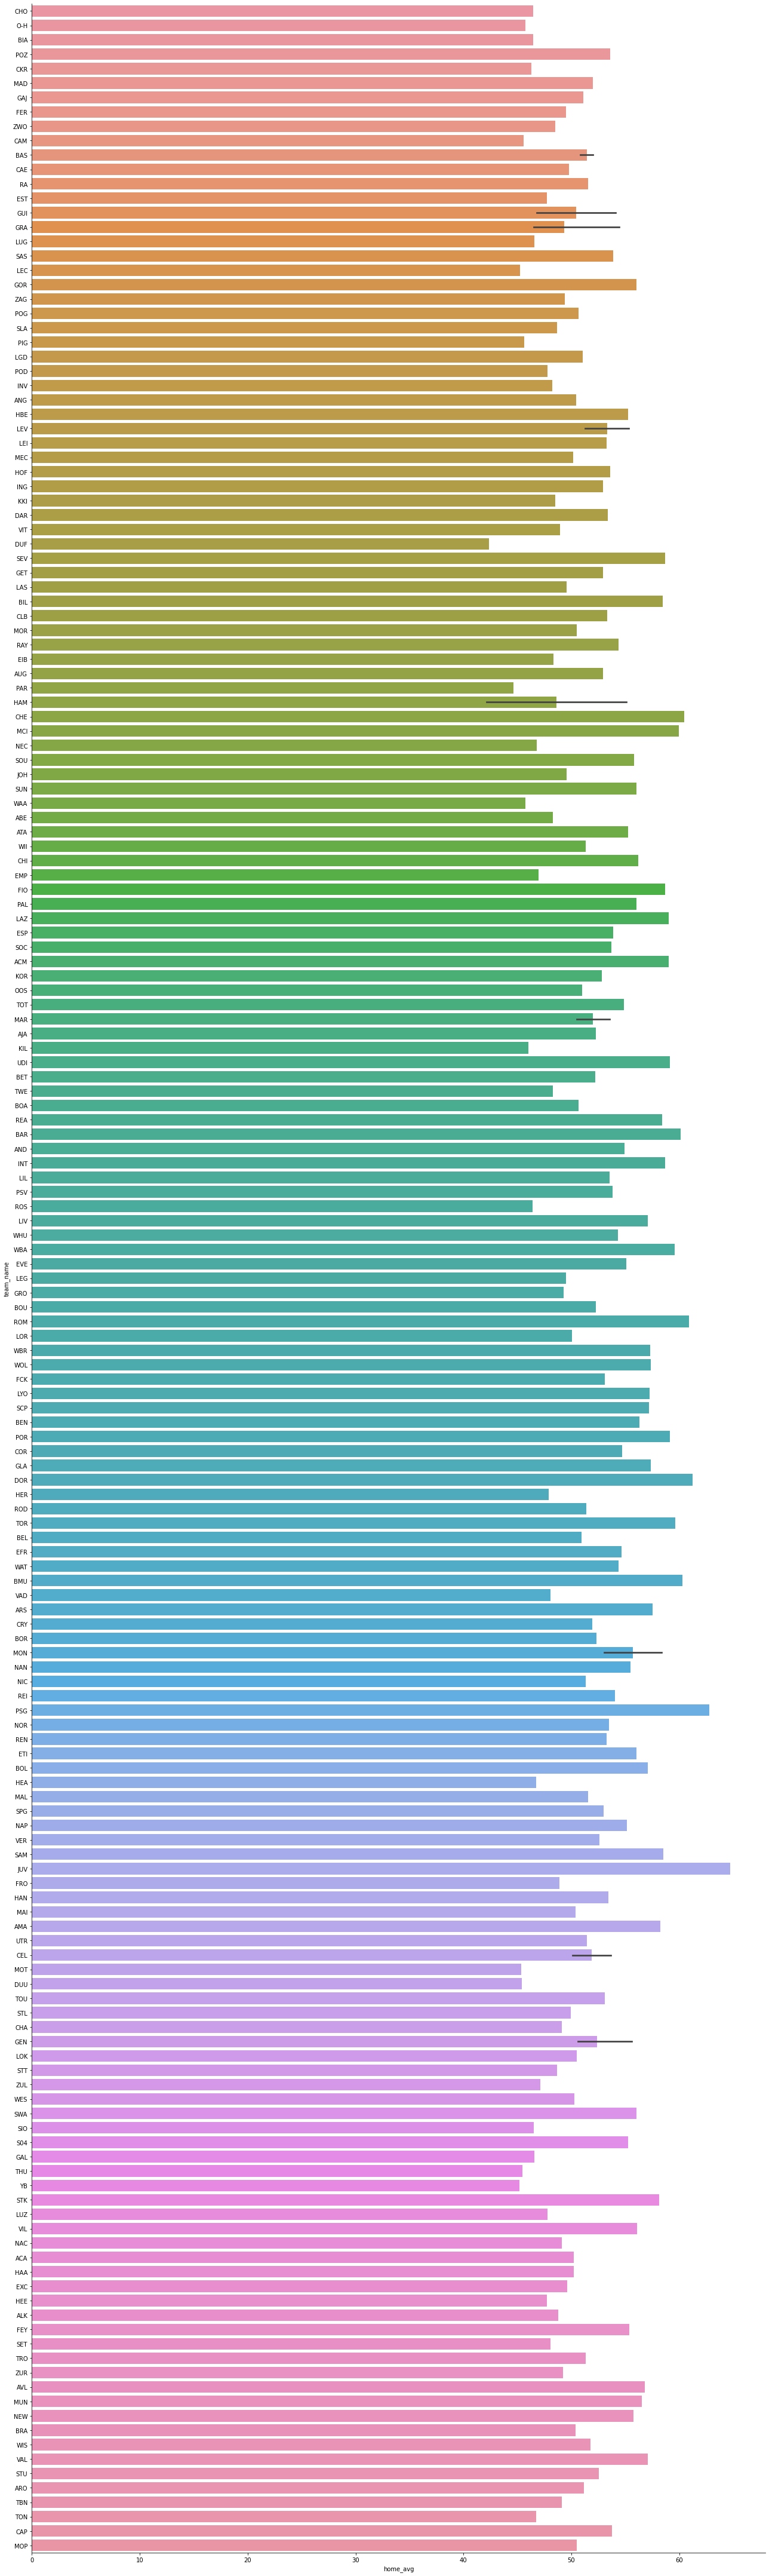

In [105]:
match_with_ratings('interceptions',"_interception")
Histoyo("_interception",'2015/2016')


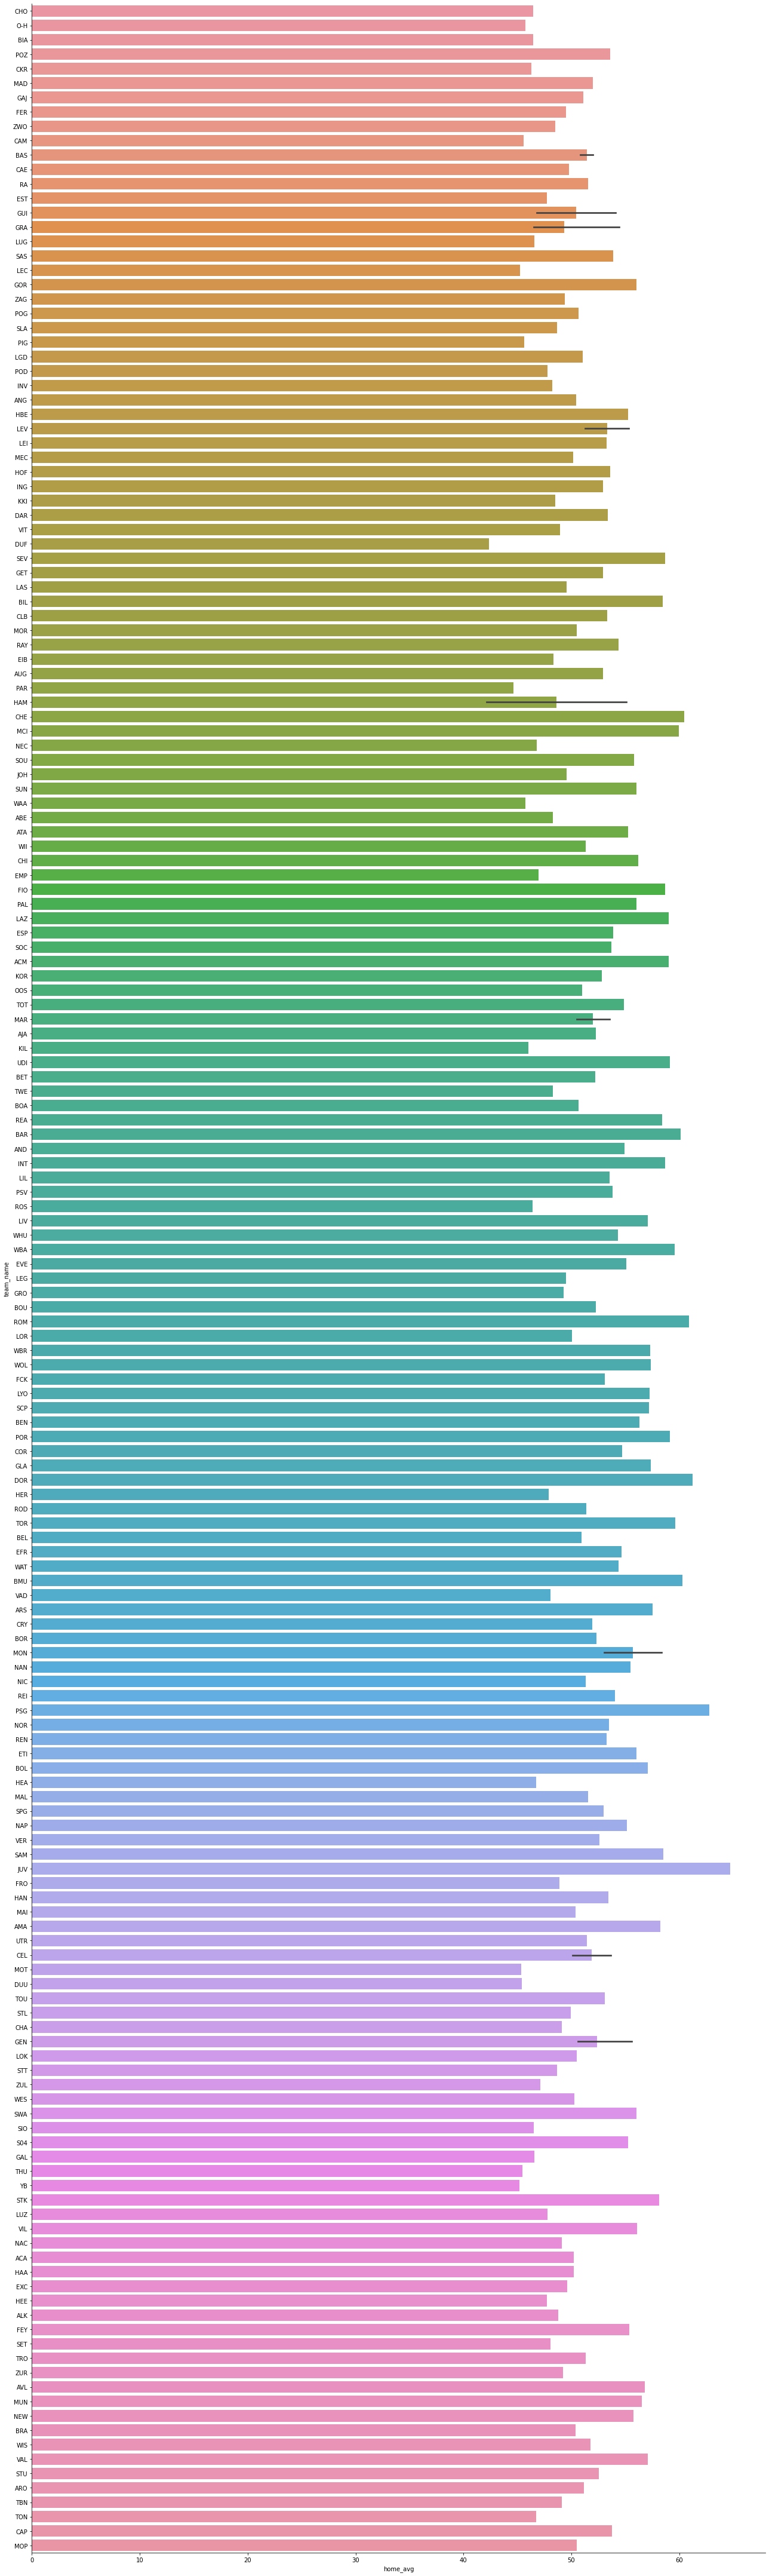

<Figure size 720x432 with 0 Axes>

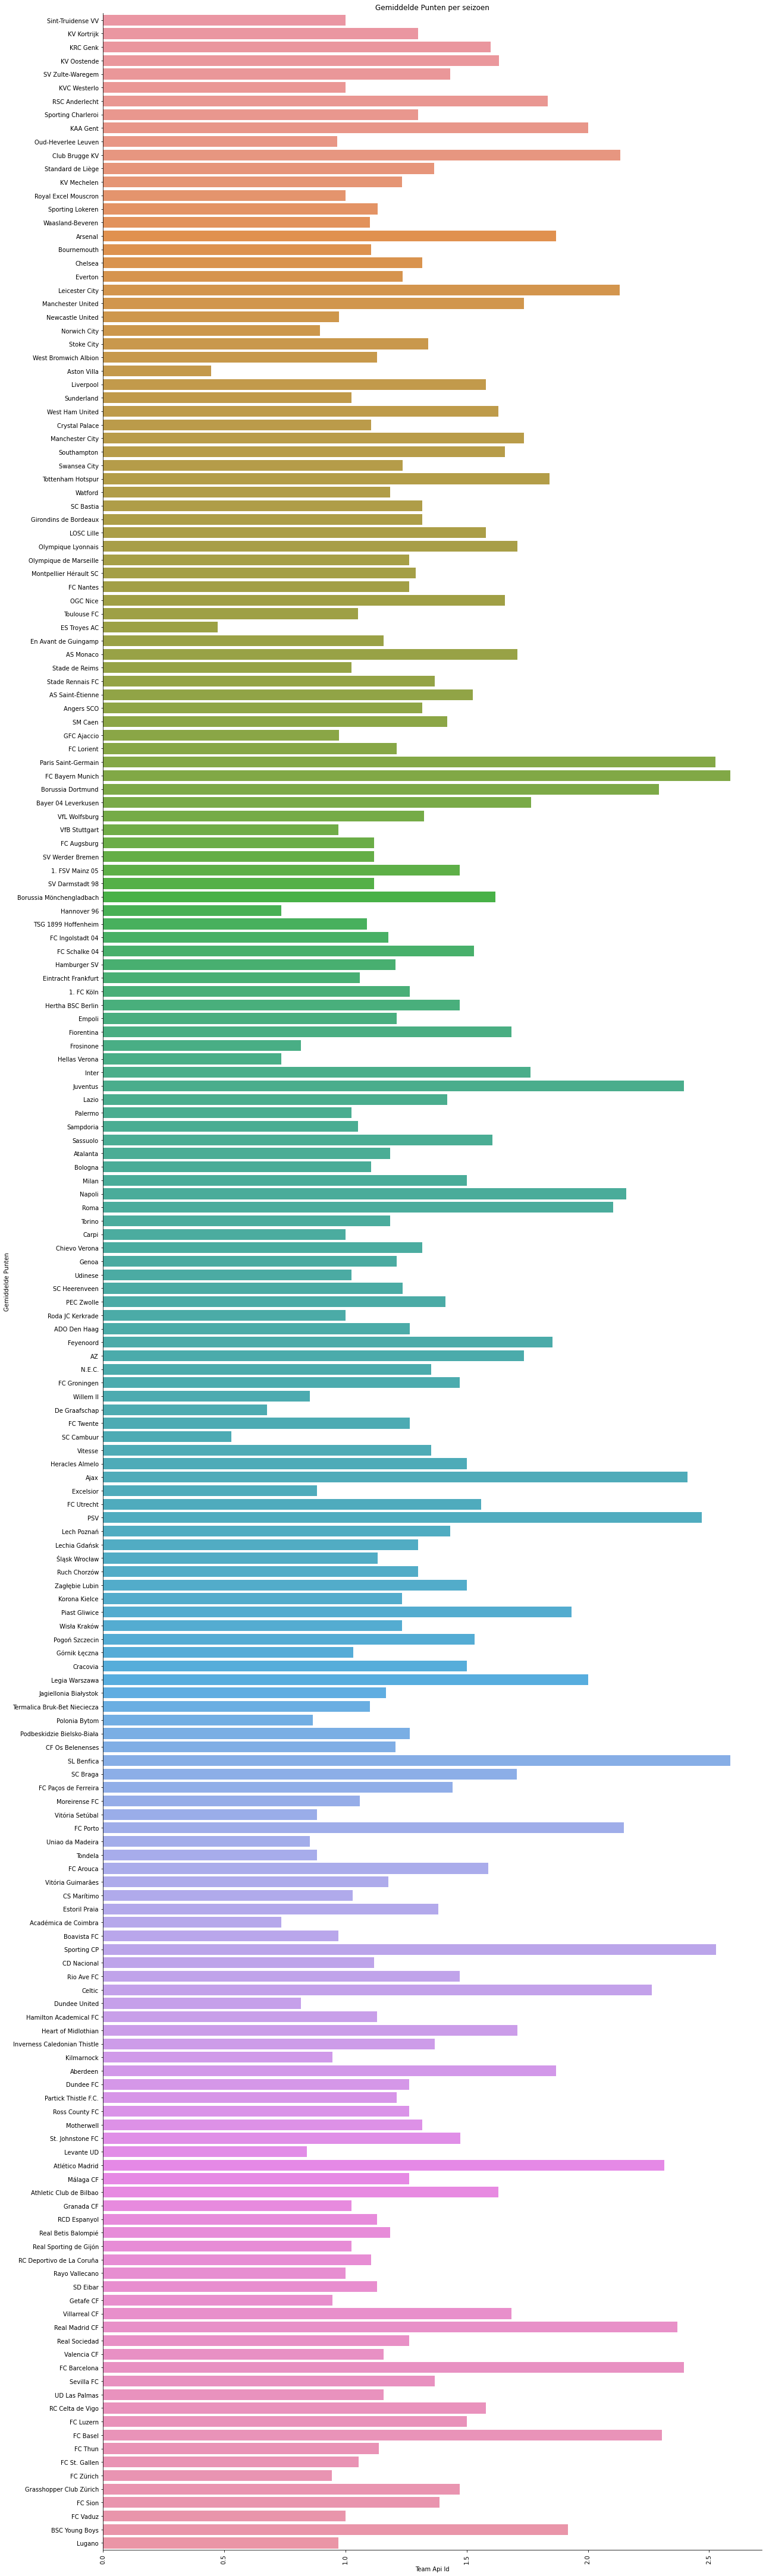

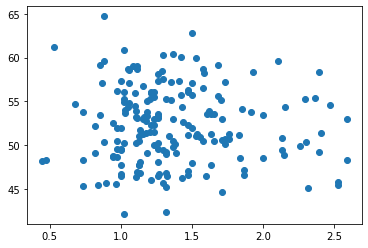

In [106]:
scatter('_interception','2015/2016')

,home_team_api_id,id,country_id,league_id,stage,match_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,away_player_5_stamina,away_player_6_stamina,away_player_7_stamina,away_player_8_stamina,away_player_9_stamina,away_player_10_stamina,away_player_11_stamina,Home_total,home_avg,team_name
0,1601,17525.200000,15722.0,15722.0,14.0,1.994724e+06,18337.866667,1.333333,1.733333,1.0,...,72.333333,69.733333,69.000000,64.866667,63.466667,69.266667,66.200000,655.066667,59.551515,CHO
1,1773,1610.200000,1.0,1.0,16.0,1.979964e+06,27021.400000,1.533333,1.466667,1.0,...,71.066667,74.200000,73.266667,71.000000,63.800000,65.733333,68.200000,705.250000,64.113636,O-H
2,1957,17526.733333,15722.0,15722.0,15.0,1.994730e+06,18314.133333,1.066667,1.466667,1.0,...,71.466667,64.733333,66.933333,66.714286,63.333333,65.357143,63.785714,691.916667,62.901515,BIA
3,2182,17519.000000,15722.0,15722.0,15.0,1.994733e+06,18299.133333,1.333333,1.133333,1.0,...,70.600000,69.266667,69.466667,62.933333,64.933333,63.800000,64.857143,759.600000,69.054545,POZ
4,2186,17513.400000,15722.0,15722.0,15.0,1.994732e+06,18298.866667,2.266667,1.266667,1.0,...,69.733333,68.600000,69.133333,68.000000,64.733333,65.333333,60.928571,692.800000,62.981818,CKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,158085,19538.529412,17642.0,17642.0,18.0,2.015964e+06,19510.823529,1.647059,1.058824,1.0,...,75.588235,71.764706,71.882353,71.294118,68.823529,68.000000,66.411765,724.636364,65.876033,ARO
184,177361,17526.733333,15722.0,15722.0,16.0,1.994739e+06,6620.533333,1.400000,1.266667,1.0,...,73.000000,68.400000,68.400000,69.857143,64.733333,65.214286,68.142857,673.333333,61.212121,TBN
185,188163,19541.058824,17642.0,17642.0,17.0,2.015958e+06,17741.529412,0.882353,1.529412,1.0,...,74.294118,72.294118,73.500000,68.176471,66.823529,70.823529,61.562500,706.000000,64.181818,TON
186,208931,13091.000000,10257.0,10257.0,19.0,2.060450e+06,9102.157895,1.210526,1.368421,1.0,...,76.842105,77.631579,75.894737,76.105263,73.947368,68.157895,70.888889,749.384615,68.125874,CAP


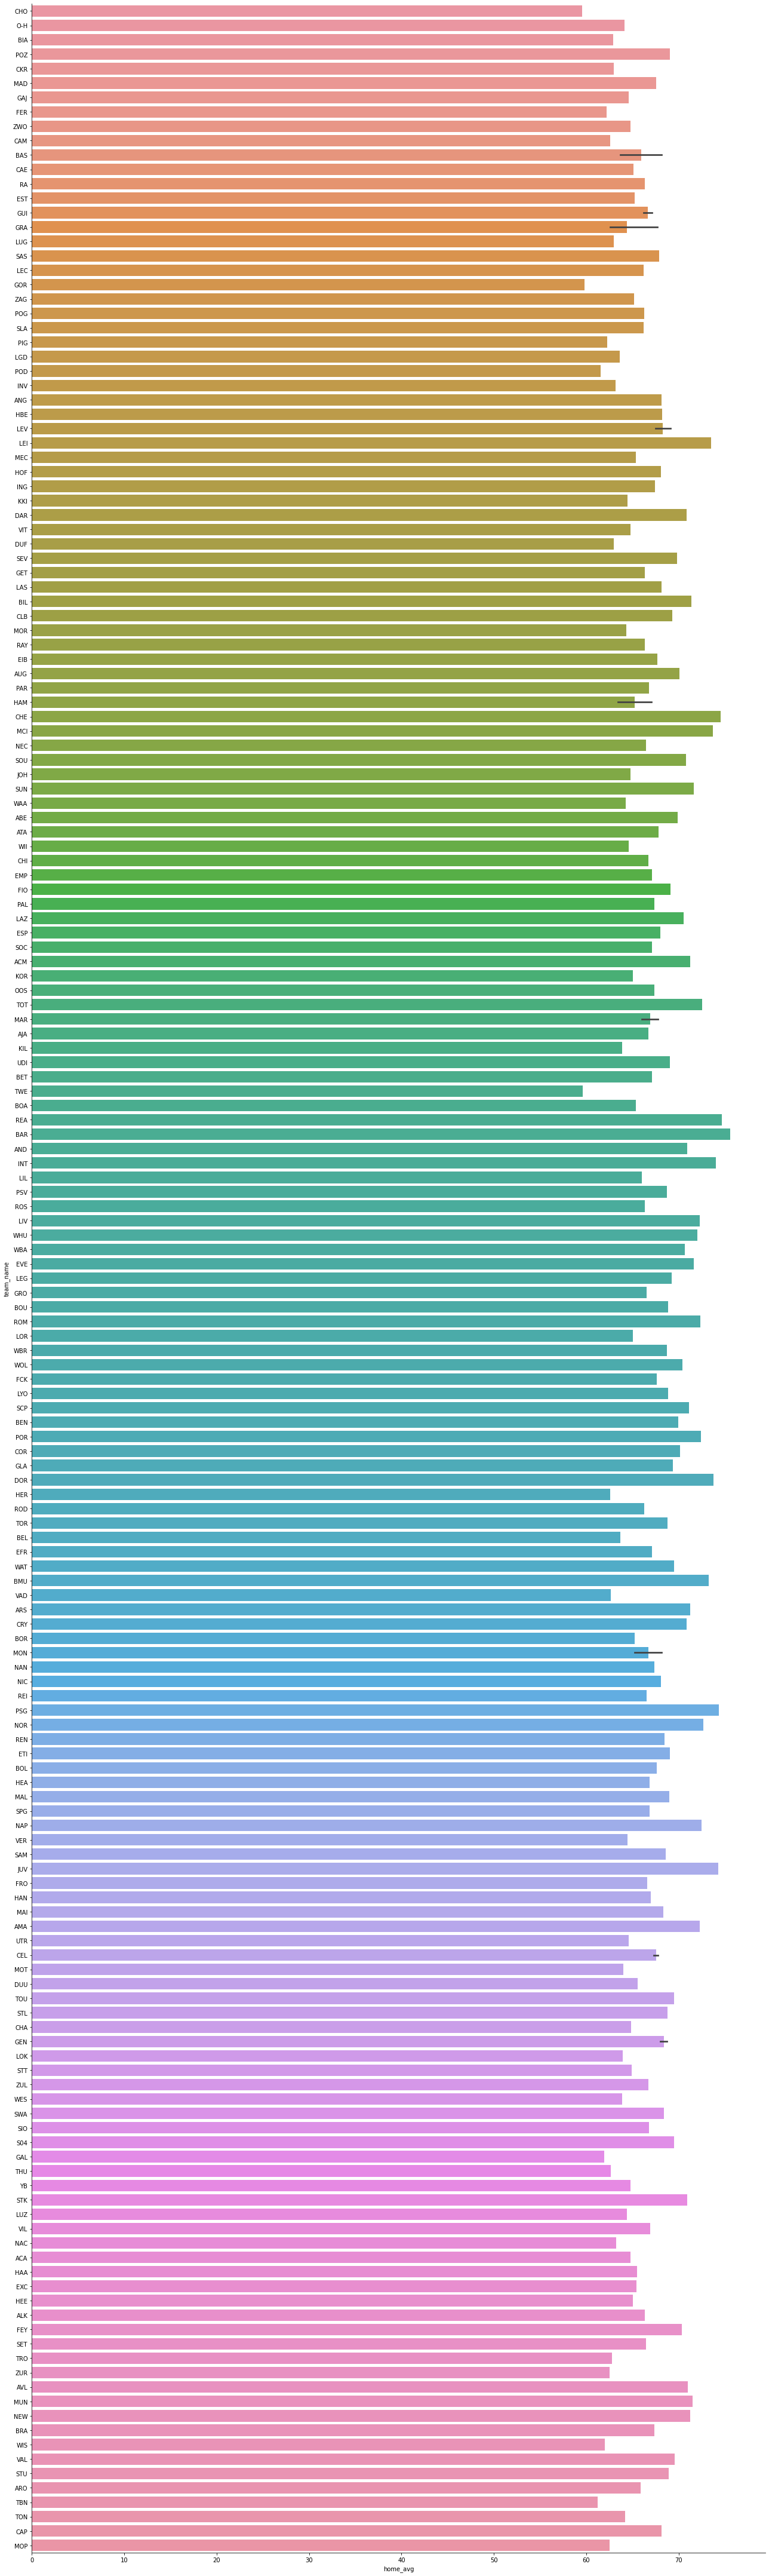

In [108]:
match_with_ratings('stamina',"_stamina")
Histoyo("_stamina",'2015/2016')


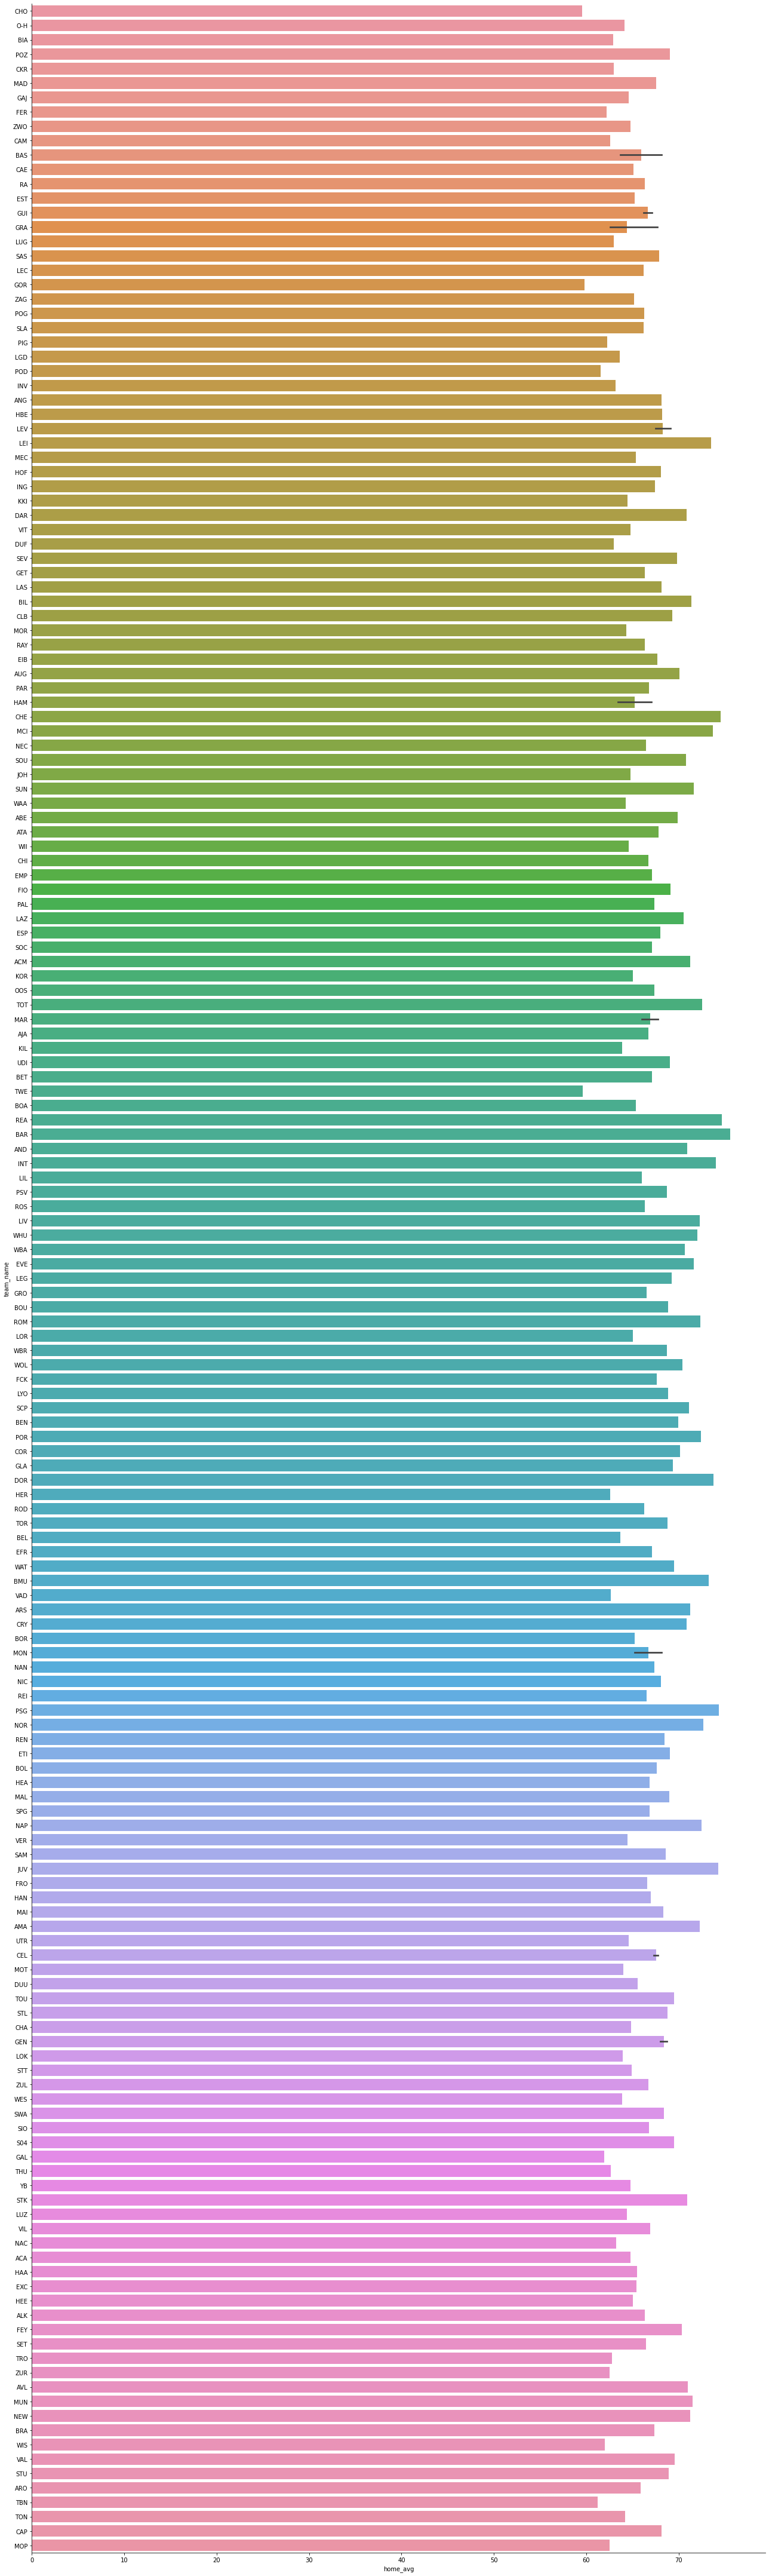

<Figure size 720x432 with 0 Axes>

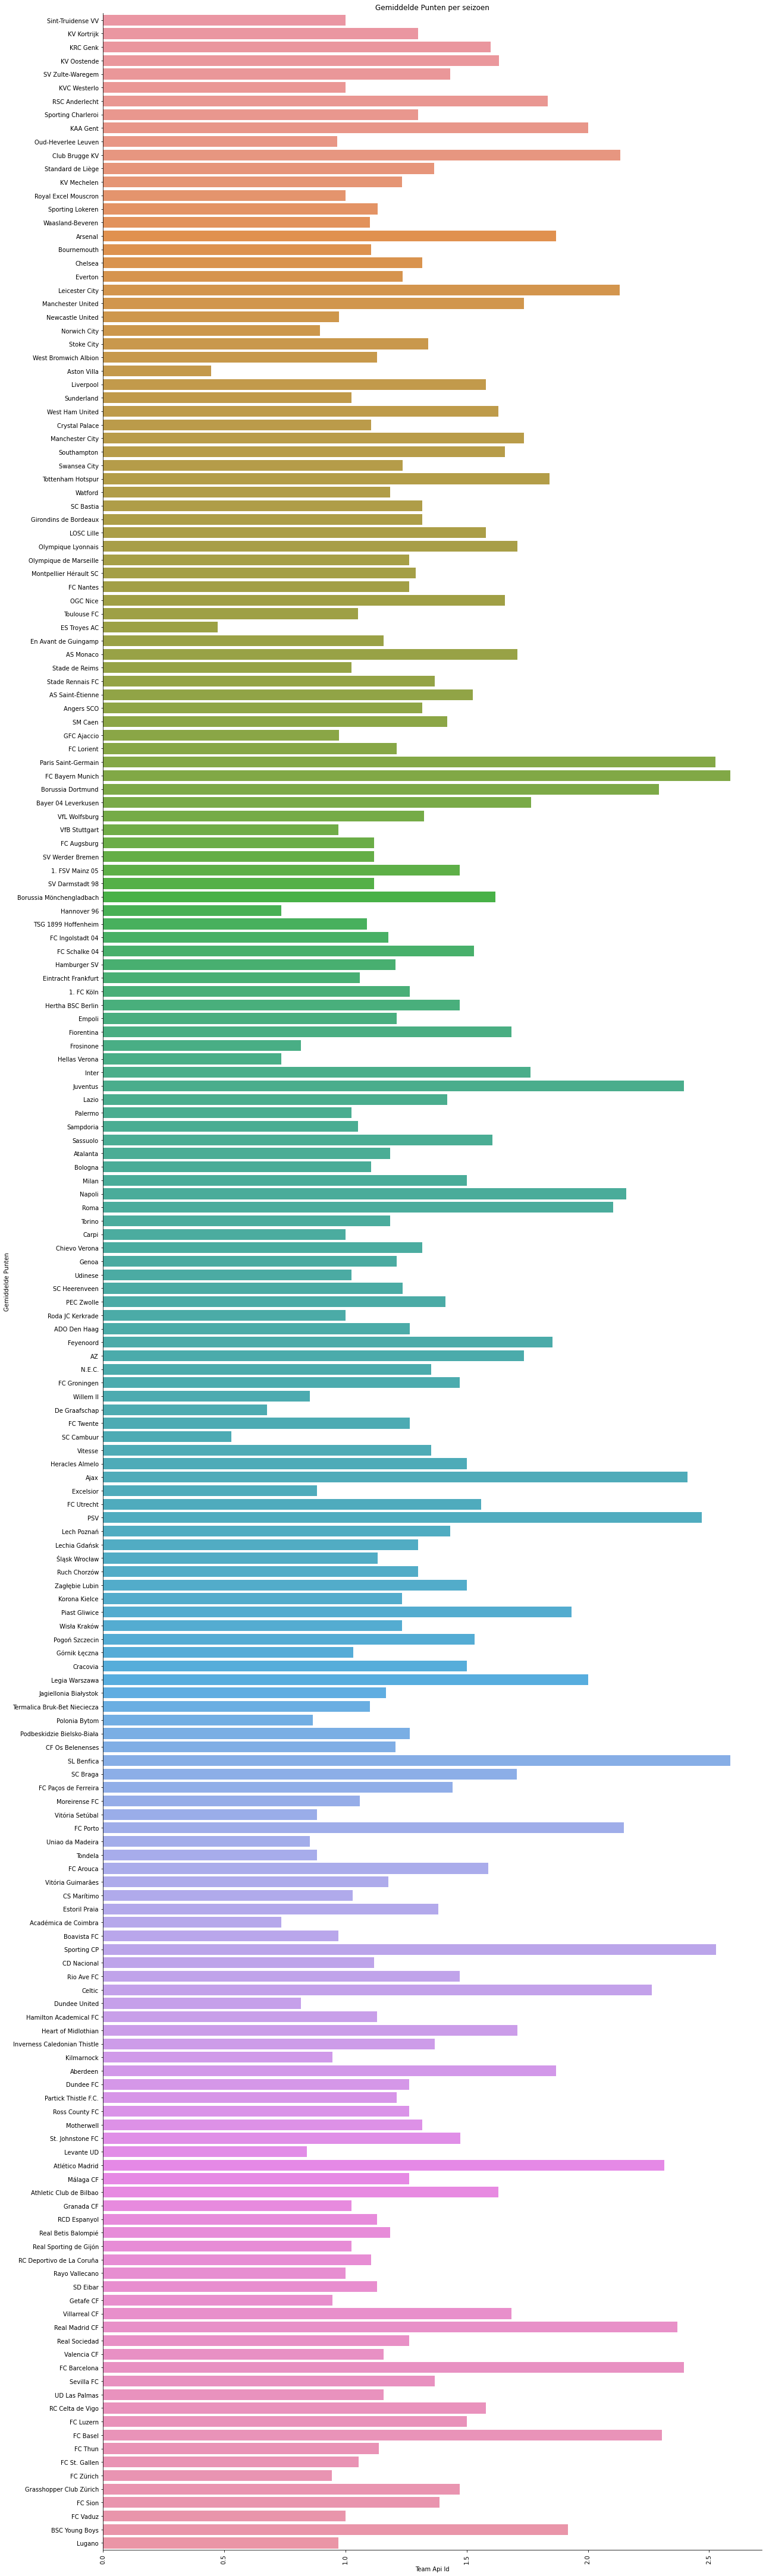

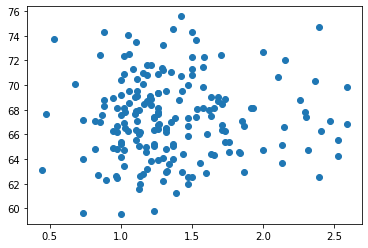

In [109]:
scatter('_stamina','2015/2016')